#Preparing the data
* Importing libraries
* Getting mutations profile - original + normalized


In [30]:
#import libraries
import scipy.io as sio
import numpy as np
import math
import pandas as pd
from google.colab import files
import csv
import random
import matplotlib.pyplot as plt
import itertools
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu
from scipy.stats import gmean
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

In [4]:
#read the profiles
control_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_control_all_upd.SBS96.all'
exp_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_exp_all_upd.SBS96.all'
control_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_control_all_norm.SBS96.all'
exp_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_exp_all_norm.SBS96.all'

control = pd.read_csv(control_path, sep='\t')
exp = pd.read_csv(exp_path, sep='\t')
control_norm = pd.read_csv(control_norm_path, sep='\t')
exp_norm = pd.read_csv(exp_norm_path, sep='\t')
print(control.head(), '\n', control_norm.head(), '\n\n\n', exp.head(), '\n', exp_norm.head()) #$

  MutationType  MSM0.1  MSM0.118  MSM0.119  MSM0.120  MSM0.127  MSM0.128  \
0      A[C>A]A      30        41        29        43        23        54   
1      A[C>A]C       1        10         1         4         2         3   
2      A[C>A]G       3         2         0         1         0         3   
3      A[C>A]T       8        10        16        18        10        22   
4      A[C>G]A       3         7         3         4         1         3   

   MSM0.129  MSM0.131  MSM0.37  MSM0.4  MSM0.45  MSM0.6  MSM0.8  MSM0.86  \
0        40        34       32      23       36      25      33       30   
1         7         3        3       2        4       2       2        3   
2         4         2        1       1        2       1       0        1   
3        19        16       10       6       10       3       6       10   
4         3         4        2       2        2       4       4        2   

   MSM0.9  
0      45  
1       3  
2       3  
3      12  
4       3   
   MutationTy

In [5]:
#create list of control original data
control_columns = []
for column in control.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_columns.append(control[column].tolist())
print(len(control_columns), control_columns) #$

#create list of control normalized data
control_norm_columns = []
for column in control_norm.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_norm_columns.append(control_norm[column].tolist())
print(len(control_norm_columns), control_norm_columns) #$

15 [[30, 1, 3, 8, 3, 0, 1, 2, 10, 7, 8, 8, 2, 0, 3, 4, 4, 2, 7, 7, 4, 0, 0, 4, 21, 3, 2, 14, 0, 1, 0, 4, 6, 7, 2, 4, 0, 1, 1, 1, 0, 3, 1, 2, 0, 0, 1, 0, 65, 7, 2, 32, 1, 1, 0, 2, 8, 5, 4, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 31, 5, 2, 58, 2, 1, 1, 2, 13, 16, 4, 4, 8, 1, 0, 0, 6, 0, 5, 4, 1, 0, 4, 1], [41, 10, 2, 10, 7, 1, 3, 2, 18, 7, 11, 5, 3, 0, 1, 5, 10, 3, 4, 9, 2, 0, 1, 6, 26, 1, 0, 17, 1, 1, 0, 1, 16, 12, 4, 11, 1, 0, 3, 2, 7, 0, 4, 4, 2, 1, 0, 1, 81, 10, 2, 33, 2, 1, 1, 2, 7, 6, 5, 4, 0, 1, 0, 2, 0, 0, 4, 7, 1, 0, 0, 0, 36, 12, 3, 81, 5, 3, 2, 4, 15, 4, 6, 11, 6, 1, 2, 3, 9, 1, 7, 7, 0, 0, 2, 6], [29, 1, 0, 16, 3, 2, 2, 0, 8, 5, 3, 9, 1, 2, 1, 3, 4, 1, 3, 5, 1, 0, 0, 3, 20, 3, 4, 12, 1, 1, 2, 0, 14, 6, 7, 2, 0, 1, 1, 2, 1, 0, 3, 4, 1, 0, 0, 1, 77, 4, 2, 29, 2, 0, 0, 3, 4, 5, 5, 3, 2, 0, 0, 2, 3, 1, 1, 1, 0, 0, 0, 0, 39, 10, 1, 49, 1, 2, 0, 1, 5, 4, 4, 5, 4, 3, 1, 5, 1, 0, 4, 5, 0, 2, 1, 2], [43, 4, 1, 18, 4, 2, 1, 5, 20, 10, 17, 14, 1, 1, 3, 6, 3, 2, 4, 9, 2, 2, 1, 2, 36, 4, 0

In [6]:
#create list of exp original data
exp_columns = []
for column in exp.columns[1:]:  # from column 2 (ignore the mutation types column)
  exp_columns.append(exp[column].tolist())
print(len(exp_columns), exp_columns) #$

#create list of exp norm data
exp_norm_columns = []
for column in exp_norm.columns[1:]: # from column 2 (ignore the mutation types column)
  exp_norm_columns.append(exp_norm[column].tolist())
print(len(exp_norm_columns), exp_norm_columns) #$

113 [[51, 4, 2, 23, 7, 7, 2, 2, 42, 14, 10, 15, 7, 3, 4, 11, 15, 3, 4, 7, 2, 1, 1, 7, 29, 5, 1, 17, 10, 3, 2, 5, 31, 9, 16, 18, 2, 4, 4, 6, 5, 3, 2, 9, 3, 0, 3, 7, 129, 9, 4, 51, 6, 3, 2, 5, 25, 23, 12, 20, 1, 1, 1, 3, 3, 0, 4, 7, 2, 0, 2, 1, 70, 17, 1, 91, 11, 11, 0, 8, 17, 16, 3, 9, 11, 6, 4, 8, 13, 4, 2, 7, 3, 3, 1, 9], [19, 3, 1, 17, 3, 1, 0, 2, 8, 6, 7, 8, 1, 2, 1, 3, 11, 2, 1, 8, 2, 1, 0, 3, 15, 3, 3, 8, 2, 3, 2, 3, 12, 7, 3, 6, 1, 2, 2, 0, 3, 0, 0, 1, 0, 0, 1, 2, 66, 5, 1, 24, 0, 1, 0, 0, 8, 1, 3, 7, 0, 1, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 26, 7, 2, 44, 1, 0, 1, 1, 7, 15, 4, 8, 7, 1, 3, 6, 8, 6, 1, 4, 0, 0, 1, 6], [42, 3, 0, 11, 4, 0, 1, 1, 13, 13, 9, 8, 0, 0, 1, 4, 4, 2, 2, 1, 0, 0, 0, 4, 13, 5, 3, 8, 0, 2, 0, 0, 13, 9, 6, 11, 0, 3, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 66, 4, 4, 20, 0, 2, 0, 1, 7, 7, 10, 3, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 21, 5, 0, 48, 3, 1, 0, 0, 10, 8, 4, 1, 4, 1, 0, 3, 4, 1, 0, 4, 0, 0, 2, 2], [143, 9, 5, 41, 6, 6, 1, 5, 22, 14, 7, 13, 8, 3, 2, 22, 14, 4, 5, 5, 1, 

In [7]:
# Converting from MSM0 codes to samples names

sample_codes = [] #each position contains the code and name of a sample

start_saving = False # when to start reading the dictionary txt file

# get all the lines with the codes conversions
with open('/content/drive/MyDrive/RT_signatures/samples_dict.txt', 'r') as file:
    # Read the file line by line
    for line in file:
        # Check if the line contains Sample.Name - the header of the conversions table
        if 'Sample.Name' in line:
            # Set the flag to start saving lines
            start_saving = True
        # Check if we should start saving lines
        if start_saving:
            sample_codes.append(line)
#print(len(sample_codes), '\n', sample_codes[-3:]) #$
print(len(sample_codes), sample_codes)

# Each line is a list with the code[0] and the real name[1], seperated by \t
for i in range(len(sample_codes)):
  s = sample_codes[i]
  s = s.strip('\n')
  s = s.split('\t')
  sample_codes[i] = s # each position is a list with the code [0] and name [1]
sample_codes = sample_codes[1:] # Ignore the header
print(len(sample_codes), '\n', sample_codes) #$

# Sort the list based on the second element in each sublist - the real name
sorted_codes = sorted(sample_codes, key=lambda x: x[1])
print(len(sorted_codes), '\n', sorted_codes) #$

codes_order = [i[0] for i in sorted_codes] #get the alphebetical order of the codes (MSM0), according to the real name (second position)
print(len(codes_order), '\n', codes_order) #$

#get the codes divided to conrtol and exp (MSM0)
control_codes = list(control.columns)[1:]
exp_codes = list(exp.columns)[1:]
print(len(control_codes), control_codes, '\n', len(exp_codes), exp_codes) #$

#find order of control and exp seperately
control_order = []
exp_order = []
for i in codes_order: #go through the codes alphebeticaly
  if i in control_codes: #control code
    control_order.append(i)
  else: #exp code
    exp_order.append(i)
print(len(control_order), control_order) #$
print(len(exp_order), exp_order) #$

#create new dfs of control and exp, sorted alphebetically
control_order.insert(0, 'MutationType')
exp_order.insert(0, 'MutationType')
control_sorted = control[control_order] #control sorted df
control_norm_sorted = control_norm[control_order] #control sorted df
exp_sorted = exp[exp_order] #exp sorted df
exp_norm_sorted = exp_norm[exp_order] #exp sorted df

print(control_sorted.head(), '\n', control_norm_sorted.head(), '\n\n\n', exp_sorted.head(), '\n', exp_norm_sorted.head()) #$

129 ['Sample.Name\tTreatment\n', 'MSM0.105\tAcetaldehyde (12 mM)\n', 'MSM0.23\tAcetaldehyde (0.9 mM)\n', 'MSM0.104\tFormaldehyde (120 uM)\n', 'MSM0.34\tFormaldehyde (85.5 uM)\n', 'MSM0.110\tDMH (11.6 mM) + S9\n', 'MSM0.99\tDMH (9 mM)\n', 'MSM0.67\tDES (0.938 mM)\n', 'MSM0.68\tDMS (0.078 mM)\n', 'MSM0.24\tENU (400 uM)\n', 'MSM0.47\tMMS (100 uM)\n', 'MSM0.108\tMNNG (0.75 uM)\n', 'MSM0.22\tMNU (350 uM)\n', 'MSM0.33\tBleomycin (0.188 uM)\n', 'MSM0.72\tCarboplatin (5 uM)\n', 'MSM0.7\tCisplatin (3.125 uM)\n', 'MSM0.83\tCisplatin (12.5 uM)\n', 'MSM0.48\tCamptothecin (0.0063 uM)\n', 'MSM0.101\tCyclophosphamide (60 uM) + S9\n', 'MSM0.25\tCyclophosphamide (18.75 uM) + S9\n', 'MSM0.32\tEllipticine (0.125 uM)\n', 'MSM0.41\tEllipticine (0.375 uM) + S9\n', 'MSM0.88\tEllipticine (0.625 uM) + S9\n', 'MSM0.89\tEllipticine (0.25 uM)\n', 'MSM0.18\tEtoposide (0.0188 uM)\n', 'MSM0.66\tMechlorethamine (0.3 uM)\n', 'MSM0.10\tMelphalan (1.5 uM)\n', 'MSM0.15\tMitomycin C (0.313 uM)\n', 'MSM0.59\tOlaparib (0.62

In [8]:
#create list of sorted control original data
control_columns_sorted = []
for column in control_sorted.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_columns_sorted.append(control_sorted[column].tolist())
print(len(control_columns_sorted), control_columns_sorted) #$

#create list of sorted control norm data
control_norm_columns_sorted = []
for column in control_norm_sorted.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_norm_columns_sorted.append(control_norm_sorted[column].tolist())
print(len(control_norm_columns_sorted), control_norm_columns_sorted) #$

#create list of sorted exp data
exp_columns_sorted = []
for column in exp_sorted.columns[1:]: # from column 2 (ignore the mutation types column)
  exp_columns_sorted.append(exp_sorted[column].tolist())
print(len(exp_columns_sorted), exp_columns_sorted) #$

#create list of sorted exp norm data
exp_norm_columns_sorted = []
for column in exp_norm_sorted.columns[1:]: # from column 2 (ignore the mutation types column)
  exp_norm_columns_sorted.append(exp_norm_sorted[column].tolist())
print(len(exp_norm_columns_sorted), exp_norm_columns_sorted) #$

15 [[45, 3, 3, 12, 3, 2, 1, 2, 17, 8, 12, 7, 4, 1, 5, 7, 13, 2, 10, 2, 1, 0, 2, 3, 31, 5, 4, 15, 3, 2, 1, 2, 22, 12, 9, 17, 3, 1, 0, 6, 2, 1, 6, 6, 0, 1, 5, 2, 113, 6, 7, 54, 1, 1, 0, 2, 7, 6, 2, 10, 1, 2, 1, 5, 1, 3, 2, 6, 1, 2, 0, 3, 45, 13, 4, 66, 1, 4, 1, 4, 21, 20, 10, 17, 4, 0, 0, 8, 8, 0, 4, 5, 1, 3, 3, 7], [34, 3, 2, 16, 4, 2, 0, 2, 8, 5, 6, 7, 5, 2, 0, 8, 11, 3, 4, 3, 1, 2, 0, 1, 23, 2, 2, 11, 1, 3, 0, 2, 15, 11, 6, 11, 2, 1, 0, 1, 3, 1, 1, 4, 1, 0, 0, 3, 93, 5, 5, 43, 1, 1, 1, 2, 15, 8, 5, 5, 1, 1, 0, 3, 2, 1, 0, 1, 0, 0, 0, 1, 38, 12, 5, 93, 1, 2, 1, 2, 12, 3, 7, 8, 5, 4, 3, 4, 6, 1, 2, 5, 0, 2, 0, 4], [32, 3, 1, 10, 2, 1, 0, 1, 10, 5, 1, 8, 1, 3, 2, 2, 5, 0, 4, 5, 3, 1, 0, 4, 28, 4, 1, 15, 1, 3, 1, 1, 15, 10, 7, 6, 3, 1, 0, 0, 3, 1, 3, 4, 0, 1, 1, 2, 65, 5, 2, 37, 3, 1, 2, 0, 9, 7, 6, 6, 0, 0, 1, 2, 3, 0, 2, 4, 0, 1, 0, 1, 26, 9, 5, 65, 3, 2, 1, 4, 10, 6, 6, 5, 5, 3, 0, 1, 6, 1, 1, 4, 0, 2, 0, 2], [30, 3, 1, 10, 2, 1, 0, 2, 13, 6, 7, 8, 4, 2, 0, 7, 5, 2, 4, 5, 0, 2, 0, 1, 1

#Replicates RT
* Getting mutations profiles divided to 2 RT regions (ERR & LRR) - original + normalized

In [9]:
#read the original profiles
all_control_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_control_all_sub.SBS96.all'
all_exp_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_exp_all_sub.SBS96.all'
early_control_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_control_early_sub.SBS96.all'
early_exp_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_exp_early_sub.SBS96.all'
late_control_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_control_late_sub.SBS96.all'
late_exp_sub_path = '/content/drive/MyDrive/RT_signatures/mutagen_2rt_exp_late_sub.SBS96.all'

#read the normalized profiles
all_control_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_control_all_sub_norm_2.SBS96.all'
all_exp_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_exp_all_sub_norm_2.SBS96.all'
early_control_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_control_early_sub_norm_2.SBS96.all'
early_exp_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_exp_early_sub_norm_2.SBS96.all'
late_control_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_control_late_sub_norm_2.SBS96.all'
late_exp_sub_norm_path = '/content/drive/MyDrive/RT_signatures/mutagen_exp_late_sub_norm_2.SBS96.all'


control = pd.read_csv(all_control_sub_path, sep='\t')
exp = pd.read_csv(all_exp_sub_path, sep='\t')
print(control.head(), exp.head()) #$
control_e = pd.read_csv(early_control_sub_path, sep='\t')
exp_e = pd.read_csv(early_exp_sub_path, sep='\t')
print(control_e.head(), exp_e.head()) #$
control_l = pd.read_csv(late_control_sub_path, sep='\t')
exp_l = pd.read_csv(late_exp_sub_path, sep='\t')
print(control_l.head(), exp_l.head()) #$

#normalized profiles
control_norm = pd.read_csv(all_control_sub_norm_path, sep='\t')
exp_norm = pd.read_csv(all_exp_sub_norm_path, sep='\t')
print(control_norm.head(), exp_norm.head()) #$
control_e_norm = pd.read_csv(early_control_sub_norm_path, sep='\t')
exp_e_norm = pd.read_csv(early_exp_sub_norm_path, sep='\t')
print(control_e_norm.head(), exp_e_norm.head()) #$
control_l_norm = pd.read_csv(late_control_sub_norm_path, sep='\t')
exp_l_norm = pd.read_csv(late_exp_sub_norm_path, sep='\t')
print(control_l_norm.head(), exp_l_norm.head()) #$

  MutationType  MSM0.118_s1  MSM0.118_s2  MSM0.119_s1  MSM0.119_s2  \
0      A[C>A]A           21           20           17           12   
1      A[C>A]C            7            3            1            0   
2      A[C>A]G            1            1            0            0   
3      A[C>A]T            9            1            6           10   
4      A[C>G]A            7            0            1            2   

   MSM0.120_s1  MSM0.120_s2  MSM0.120_s3  MSM0.127_s1  MSM0.127_s2  ...  \
0           20           12           11           14            9  ...   
1            3            1            0            0            2  ...   
2            0            1            0            0            0  ...   
3            6           10            2            5            5  ...   
4            1            2            1            0            1  ...   

   MSM0.4_s2  MSM0.6_s1  MSM0.6_s2  MSM0.86_s1  MSM0.86_s2  MSM0.8_s1  \
0         13         15         10          10         

In [10]:
# create lists of control original data
control_columns = []
control_e_columns = []
control_l_columns = []

for column in control.columns[1:]: # from column 2 (ignore the mutation types column)
    control_columns.append(control[column].tolist())
for column in control_e.columns[1:]: # from column 2 (ignore the mutation types column)
    control_e_columns.append(control_e[column].tolist())
for column in control_l.columns[1:]: # from column 2 (ignore the mutation types column)
    control_l_columns.append(control_l[column].tolist())

# create lists of control normalized data
control_norm_columns = []
control_e_norm_columns = []
control_l_norm_columns = []

for column in control_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    control_norm_columns.append(control_norm[column].tolist())
for column in control_e_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    control_e_norm_columns.append(control_e_norm[column].tolist())
for column in control_l_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    control_l_norm_columns.append(control_l_norm[column].tolist())

# create lists of exp original data
exp_columns = []
exp_e_columns = []
exp_l_columns = []

for column in exp.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_columns.append(exp[column].tolist())
for column in exp_e.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_e_columns.append(exp_e[column].tolist())
for column in exp_l.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_l_columns.append(exp_l[column].tolist())

# create lists pf exp normalized data
exp_norm_columns = []
exp_e_norm_columns = []
exp_l_norm_columns = []

for column in exp_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_norm_columns.append(exp_norm[column].tolist())
for column in exp_e_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_e_norm_columns.append(exp_e_norm[column].tolist())
for column in exp_l_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_l_norm_columns.append(exp_l_norm[column].tolist())

print(len(control_columns), len(control_e_columns), len(control_l_columns), len(control_norm_columns), len(control_e_norm_columns), len(control_l_norm_columns), '\n', len(exp_columns), len(exp_e_columns), len(exp_l_columns), len(exp_norm_columns), len(exp_e_norm_columns), len(exp_l_norm_columns)) #$

35 35 35 35 35 35 
 289 289 289 289 289 289


In [11]:
# Converting from MSM0 codes to samples names

print(codes_order)

#get the codes divided to conrtol and exp (MSM0)
control_codes = list(control.columns)[1:]
exp_codes = list(exp.columns)[1:]
print(len(control_codes), control_codes, '\n', len(exp_codes), exp_codes) #$

#find order of control and exp seperately
control_order = []
exp_order = []
for i in codes_order: #go through the codes alphebeticaly
  if any(item.startswith(i + '_') for item in control_codes):
    codes = [item for j, item in enumerate(control_codes) if item.startswith(i + '_')]
    control_order.append(codes)
  else: #exp code
    codes = [item for j, item in enumerate(exp_codes) if item.startswith(i + '_')]
    exp_order.append(codes)
print(len(control_order), control_order) #$
print(len(exp_order), exp_order) #$

control_order_flat = [item for sublist in control_order for item in sublist]
exp_order_flat = [item for sublist in exp_order for item in sublist]
print(len(control_order_flat), control_order_flat)
print(len(exp_order_flat), exp_order_flat)

control_order_flat.insert(0, 'MutationType')
exp_order_flat.insert(0, 'MutationType')

#sort original control alphebetically
control_sorted = control[control_order_flat]
control_e_sorted = control_e[control_order_flat]
control_l_sorted = control_l[control_order_flat]

#sort normalized control alphebetically
control_norm_sorted = control_norm[control_order_flat]
control_e_norm_sorted = control_e_norm[control_order_flat]
control_l_norm_sorted = control_l_norm[control_order_flat] #control sorted df

#sort original exp alphebetically
exp_sorted = exp[exp_order_flat]
exp_e_sorted = exp_e[exp_order_flat]
exp_l_sorted = exp_l[exp_order_flat]
print(exp_sorted.head(), '\n', exp_e_sorted.head(), '\n', exp_l_sorted.head()) #$
#sort normalized control alphebetically
exp_norm_sorted = exp_norm[exp_order_flat]
exp_e_norm_sorted = exp_e_norm[exp_order_flat]
exp_l_norm_sorted = exp_l_norm[exp_order_flat] #control sorted df
#print(control_sorted.head(), '\n', control_norm_sorted.head(), '\n\n\n', exp_sorted.head(), '\n', exp_norm_sorted.head()) #$

['MSM0.38', 'MSM0.50', 'MSM0.16', 'MSM0.95', 'MSM0.29', 'MSM0.91', 'MSM0.107', 'MSM0.100', 'MSM0.121', 'MSM0.114', 'MSM0.113', 'MSM0.17', 'MSM0.97', 'MSM0.81', 'MSM0.5', 'MSM0.87', 'MSM0.126', 'MSM0.43', 'MSM0.54', 'MSM0.40', 'MSM0.27', 'MSM0.94', 'MSM0.93', 'MSM0.3', 'MSM0.58', 'MSM0.49', 'MSM0.85', 'MSM0.84', 'MSM0.23', 'MSM0.105', 'MSM0.57', 'MSM0.52', 'MSM0.2', 'MSM0.26', 'MSM0.92', 'MSM0.111', 'MSM0.112', 'MSM0.33', 'MSM0.20', 'MSM0.48', 'MSM0.72', 'MSM0.51', 'MSM0.83', 'MSM0.7', 'MSM0.46', 'MSM0.25', 'MSM0.101', 'MSM0.42', 'MSM0.74', 'MSM0.14', 'MSM0.103', 'MSM0.130', 'MSM0.82', 'MSM0.12', 'MSM0.132', 'MSM0.13', 'MSM0.96', 'MSM0.67', 'MSM0.110', 'MSM0.99', 'MSM0.68', 'MSM0.9', 'MSM0.131', 'MSM0.37', 'MSM0.86', 'MSM0.118', 'MSM0.119', 'MSM0.4', 'MSM0.24', 'MSM0.32', 'MSM0.89', 'MSM0.41', 'MSM0.88', 'MSM0.18', 'MSM0.104', 'MSM0.34', 'MSM0.55', 'MSM0.71', 'MSM0.53', 'MSM0.1', 'MSM0.45', 'MSM0.19', 'MSM0.62', 'MSM0.36', 'MSM0.39', 'MSM0.47', 'MSM0.108', 'MSM0.22', 'MSM0.116', 'MSM0.1

In [12]:
#create lists of sorted control original data
control_columns_sorted = []
for column in control_sorted.columns[1:]:
    control_columns_sorted.append(control_sorted[column].tolist())
control_e_columns_sorted = []
for column in control_e_sorted.columns[1:]:
    control_e_columns_sorted.append(control_e_sorted[column].tolist())
control_l_columns_sorted = []
for column in control_l_sorted.columns[1:]:
    control_l_columns_sorted.append(control_l_sorted[column].tolist())
print(len(control_columns_sorted), control_columns_sorted, '\n', len(control_e_columns_sorted), control_e_columns_sorted, '\n', len(control_l_columns_sorted), control_l_columns_sorted) #$

#create lists of sorted control normalized data
control_norm_columns_sorted = []
for column in control_norm_sorted.columns[1:]:
    control_norm_columns_sorted.append(control_norm_sorted[column].tolist())
control_e_norm_columns_sorted = []
for column in control_e_norm_sorted.columns[1:]:
    control_e_norm_columns_sorted.append(control_e_norm_sorted[column].tolist())
control_l_norm_columns_sorted = []
for column in control_l_norm_sorted.columns[1:]:
    control_l_norm_columns_sorted.append(control_l_norm_sorted[column].tolist())
print(len(control_norm_columns_sorted), control_norm_columns_sorted, '\n', len(control_e_norm_columns_sorted), control_e_norm_columns_sorted, '\n', len(control_l_norm_columns_sorted), control_l_norm_columns_sorted) #$


#create lists of sorted exp original data
exp_columns_sorted = []
for column in exp_sorted.columns[1:]:
    exp_columns_sorted.append(exp_sorted[column].tolist())
exp_e_columns_sorted = []
for column in exp_e_sorted.columns[1:]:
    exp_e_columns_sorted.append(exp_e_sorted[column].tolist())
exp_l_columns_sorted = []
for column in exp_l_sorted.columns[1:]:
    exp_l_columns_sorted.append(exp_l_sorted[column].tolist())
print(len(exp_columns_sorted), exp_columns_sorted, '\n', len(exp_e_columns_sorted), exp_e_columns_sorted, '\n', len(exp_l_columns_sorted), exp_l_columns_sorted) #$

#create lists of sorted exp normalized data
exp_norm_columns_sorted = []
for column in exp_norm_sorted.columns[1:]:
    exp_norm_columns_sorted.append(exp_norm_sorted[column].tolist())
exp_e_norm_columns_sorted = []
for column in exp_e_norm_sorted.columns[1:]:
    exp_e_norm_columns_sorted.append(exp_e_norm_sorted[column].tolist())
exp_l_norm_columns_sorted = []
for column in exp_l_norm_sorted.columns[1:]:
    exp_l_norm_columns_sorted.append(exp_l_norm_sorted[column].tolist())
print(len(exp_norm_columns_sorted), exp_norm_columns_sorted, '\n', len(exp_e_norm_columns_sorted), exp_e_norm_columns_sorted, '\n', len(exp_l_norm_columns_sorted), exp_l_norm_columns_sorted) #$

35 [[13, 1, 1, 6, 1, 1, 0, 1, 7, 3, 1, 2, 3, 1, 1, 1, 4, 1, 5, 0, 0, 0, 0, 0, 12, 0, 1, 4, 1, 2, 1, 1, 4, 2, 3, 4, 0, 0, 0, 4, 0, 0, 3, 3, 0, 1, 2, 1, 44, 2, 2, 21, 0, 0, 0, 1, 1, 1, 1, 4, 1, 2, 1, 2, 0, 3, 1, 3, 0, 1, 0, 2, 13, 4, 1, 23, 0, 1, 0, 0, 4, 3, 2, 7, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3], [15, 0, 2, 2, 0, 0, 0, 1, 4, 5, 5, 3, 1, 0, 1, 4, 4, 1, 4, 2, 0, 0, 2, 1, 6, 2, 0, 4, 0, 0, 0, 1, 9, 7, 3, 8, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 34, 1, 1, 19, 0, 0, 0, 0, 5, 4, 0, 5, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 15, 5, 1, 25, 0, 1, 1, 3, 10, 16, 6, 6, 0, 0, 0, 6, 4, 0, 1, 1, 1, 2, 1, 2], [17, 2, 0, 4, 2, 1, 1, 0, 6, 0, 6, 2, 0, 0, 3, 2, 5, 0, 1, 0, 1, 0, 0, 2, 13, 3, 3, 7, 2, 0, 0, 0, 9, 3, 3, 5, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 35, 3, 4, 15, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 17, 4, 2, 18, 1, 2, 0, 1, 7, 1, 2, 4, 4, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2], [11, 1, 2, 6, 1, 1, 0, 1, 3, 0, 2, 4, 0, 0, 0, 2, 4, 2, 2, 1, 1, 2, 0, 0, 9, 1, 0, 3, 0, 1, 0, 1, 7, 4, 2, 

#Bootstrapping & Count analysis
* Spectrum analysis - bootstrap resampling
* Mutations burden analysis - mann-whitney tests (with expansions)
* Summary of results - heatmap


In [13]:
# trinucleotides normalization - create the 2 RT (& all) frequencies dataframes

# get the counts of each trinucleotide type in each RT
early_df = pd.read_csv('/content/drive/MyDrive/RT_signatures/iPSC_2rt_early_trinuc.csv')
late_df = pd.read_csv('/content/drive/MyDrive/RT_signatures/iPSC_2rt_late_trinuc.csv')

#the trinucleotide keys - 32 (complementation)
trinuc_keys = ['ACA', 'ACC', 'ACG', 'ACT', 'ATA', 'ATC', 'ATG', 'ATT',
               'CCA', 'CCC', 'CCG', 'CCT', 'CTA', 'CTC', 'CTG', 'CTT',
               'GCA', 'GCC', 'GCG', 'GCT', 'GTA', 'GTC', 'GTG', 'GTT',
               'TCA', 'TCC', 'TCG', 'TCT', 'TTA', 'TTC', 'TTG', 'TTT']

#for each f the 32 trinucleotides - get also the reversed one
indices_upd= [['ACA', 'TGT'], ['ACC', 'GGT'], ['ACG', 'CGT'], ['ACT', 'AGT'],
              ['ATA', 'TAT'], ['ATC', 'GAT'], ['ATG', 'CAT'], ['ATT', 'AAT'],
              ['CCA', 'TGG'], ['CCC', 'GGG'], ['CCG', 'CGG'], ['CCT', 'AGG'],
              ['CTA', 'TAG'], ['CTC', 'GAG'], ['CTG', 'CAG'], ['CTT', 'AAG'],
              ['GCA', 'TGC'], ['GCC', 'GGC'], ['GCG', 'CGC'], ['GCT', 'AGC'],
              ['GTA', 'TAC'], ['GTC', 'GAC'], ['GTG', 'CAC'], ['GTT', 'AAC'],
              ['TCA', 'TGA'], ['TCC', 'GGA'], ['TCG', 'CGA'], ['TCT', 'AGA'],
              ['TTA', 'TAA'], ['TTC', 'GAA'], ['TTG', 'CAA'], ['TTT', 'AAA']]

#get all possible trinucleotide combinations (with upper/lower case letters - 16 for each)
indices_comb = []
for ind in indices_upd:
  options1 = [[char.upper(), char.lower()] for char in ind[0]]
  variations1 = [''.join(combination) for combination in itertools.product(*options1)]
  options2 = [[char.upper(), char.lower()] for char in ind[1]]
  variations2 = [''.join(combination) for combination in itertools.product(*options2)]
  var = variations1 + variations2
  indices_comb.append(var)

trinuc_early= {
    'Index': trinuc_keys,
    'Frequency': [0] * len(trinuc_keys)
}

trinuc_early = pd.DataFrame(trinuc_early)
trinuc_early.set_index('Index', inplace=True)

trinuc_late= {
    'Index': trinuc_keys,
    'Frequency': [0] * len(trinuc_keys)
}

trinuc_late = pd.DataFrame(trinuc_late)
trinuc_late.set_index('Index', inplace=True)

# Define indices to sum
for ind in indices_comb:
  sum_early = early_df[early_df['Unnamed: 0'].isin(ind)].drop('Unnamed: 0', axis=1).sum()
  sum_late = late_df[late_df['Unnamed: 0'].isin(ind)].drop('Unnamed: 0', axis=1).sum()

  #print(ind, sum_values)
  trinuc_early.loc[ind[0]] = sum_early
  trinuc_late.loc[ind[0]] = sum_late

trinuc_all = pd.DataFrame({
    'Frequency': trinuc_early['Frequency'] + trinuc_late['Frequency']
})

nuc_sum = trinuc_early['Frequency'].sum() + trinuc_late['Frequency'].sum()
print(nuc_sum, trinuc_all['Frequency'].sum())

all_sum = trinuc_all['Frequency'].sum()
print(all_sum)
early_sum = trinuc_early['Frequency'].sum()
print(early_sum)
late_sum = trinuc_late['Frequency'].sum()
print(late_sum)

mut_types = list(control_sorted['MutationType'])
print(mut_types)

2668345030 2668345030
2668345030
1334074303
1334270727
['A[C>A]A', 'A[C>A]C', 'A[C>A]G', 'A[C>A]T', 'A[C>G]A', 'A[C>G]C', 'A[C>G]G', 'A[C>G]T', 'A[C>T]A', 'A[C>T]C', 'A[C>T]G', 'A[C>T]T', 'A[T>A]A', 'A[T>A]C', 'A[T>A]G', 'A[T>A]T', 'A[T>C]A', 'A[T>C]C', 'A[T>C]G', 'A[T>C]T', 'A[T>G]A', 'A[T>G]C', 'A[T>G]G', 'A[T>G]T', 'C[C>A]A', 'C[C>A]C', 'C[C>A]G', 'C[C>A]T', 'C[C>G]A', 'C[C>G]C', 'C[C>G]G', 'C[C>G]T', 'C[C>T]A', 'C[C>T]C', 'C[C>T]G', 'C[C>T]T', 'C[T>A]A', 'C[T>A]C', 'C[T>A]G', 'C[T>A]T', 'C[T>C]A', 'C[T>C]C', 'C[T>C]G', 'C[T>C]T', 'C[T>G]A', 'C[T>G]C', 'C[T>G]G', 'C[T>G]T', 'G[C>A]A', 'G[C>A]C', 'G[C>A]G', 'G[C>A]T', 'G[C>G]A', 'G[C>G]C', 'G[C>G]G', 'G[C>G]T', 'G[C>T]A', 'G[C>T]C', 'G[C>T]G', 'G[C>T]T', 'G[T>A]A', 'G[T>A]C', 'G[T>A]G', 'G[T>A]T', 'G[T>C]A', 'G[T>C]C', 'G[T>C]G', 'G[T>C]T', 'G[T>G]A', 'G[T>G]C', 'G[T>G]G', 'G[T>G]T', 'T[C>A]A', 'T[C>A]C', 'T[C>A]G', 'T[C>A]T', 'T[C>G]A', 'T[C>G]C', 'T[C>G]G', 'T[C>G]T', 'T[C>T]A', 'T[C>T]C', 'T[C>T]G', 'T[C>T]T', 'T[T>A]A', 'T[T>A]C'

In [14]:
#normalize a given column (replicate) according to relative trinucleotide frequencies
def normalize_column(con, col):

  #normalize the replicate to frequencies (divide each value by the sum of the replicate)
  total_sum = sum(col)
  norm_col = [value / total_sum for value in col]
  #print(len(norm_col), mut_types)
  #print(sum(norm_col))

  #normalize according to trinucleotide frequencies
  final_norm = []
  for i in range(len(norm_col)):
    mut = mut_types[i] # the trinucleotide
    name = mut[0] + mut[2] + mut[-1]
    if con=='ALL':
      val = trinuc_all.loc[name, 'Frequency']/all_sum
    elif con=='EARLY':
      val = trinuc_early.loc[name, 'Frequency']/early_sum
    else:
      val = trinuc_late.loc[name,'Frequency']/late_sum
    final_norm.append(norm_col[i]/val)
  return final_norm

In [15]:
def control_bootstrap_2rt(con, mut_types, control_codes_sorted, control, control_norm, exp_codes_sorted, exp, exp_norm):
  #calculate centroid original - the mean of each mutation type of the original control
  means = [sum(col) / len(col) for col in zip(*control_norm)]
  centroid_original = pd.DataFrame({'MutationType': mut_types, 'Mean': means}) #create a df

  #create replicates
  num_replicates = 285 #replicates of each control sampele (so we'll have ~10000 replicates at total)

  #create a big list with all the mutation in the control replicates
  all_mut = []
  for col in control: #expanded list of all mutations in original control (not normalized)
    all_mut.append(np.repeat(mut_types, col))

  all_mutations = [item for sublist in all_mut for item in sublist]

  control_replicates = [] #replicates of all control (10,000)
  j = 0
  for col in control: #go through each control sample
    s = sum(col) #mutations sum of this replicate

    col_replicates = [] #create 4200 replicates for each sample, in the length of the original sample

    for i in range(num_replicates):
      replicate = random.sample(all_mutations, k = s) #random selection without replacement
      mutation_counts = pd.Series(replicate).value_counts().reindex(mut_types, fill_value=0) #the counts of each mutation type in the replicate
      col_replicates.append(mutation_counts.values) #add the counts to the replicates list

    tmp = 0
    for rep in col_replicates:
      tmp+=sum(rep)
    print(j, s, tmp/num_replicates) #validation
    j+=1
    control_replicates.append(col_replicates) # add the sample's replicates to the general control replicates list

  control_replicates_all = [rep for clone_ex in control_replicates for rep in clone_ex] #join all the control samples replicates together

  d_pc = [] # list for the d_pc (distance of replicate's centroid from original centroid) values
  for sample in control_replicates_all: #choose 10,000 seven random replicates
    norm_sample = normalize_column(con, sample)
    d = np.linalg.norm(norm_sample - centroid_original.iloc[:,1].to_numpy())
    d_pc.append(d)

  #calculate d_control - distance of each control replicate from the original centroid
  d_control = []
  control_names = []
  for i, col in enumerate(control_norm):
    d = np.linalg.norm(col - centroid_original.iloc[:,1].to_numpy())
    d_control.append(d)
  for j in control_codes_sorted:
    for sublist in sorted_codes:
      if sublist[0] == j.split('_')[0]:
        control_names.append(sublist[1]+'_'+j.split('_')[1])

  d_exp = []
  exp_names = []
  for i,col in enumerate(exp_norm):
    d = np.linalg.norm(col - centroid_original.iloc[:,1].to_numpy())
    d_exp.append(d)
  for j in exp_codes_sorted:
    for sublist in sorted_codes:
      if sublist[0] == j.split('_')[0]:
        exp_names.append(sublist[1]+'_'+j.split('_')[1])

  #calculate the p_vals and p_adj of the distances
  p_vals = []
  for i, d in enumerate(d_exp):
    extreme_values = [x for x in d_pc if x > d]
    p = len(extreme_values)/len(d_pc)
    if p == 0:
      p = 1/len(d_pc)
    p_vals.append(p)

  for i, d in enumerate(d_control):
    extreme_values = [x for x in d_pc if x > d]
    p = len(extreme_values)/len(d_pc)
    if p == 0:
      p = 1/len(d_pc)
    p_vals.append(p)

  # Apply Benjamini-Hochberg correction
  reject, p_vals_corrected, _, _ = multipletests(p_vals, method='fdr_bh')

  return d_pc, d_control, d_exp, exp_names, control_names, p_vals, p_vals_corrected

mut_types = list(control_sorted['MutationType'])
d_pc_all, d_control_all, d_exp_all, exp_names, control_names, p_vals_all, p_adj_all = control_bootstrap_2rt('ALL', mut_types, control_order_flat[1:], control_columns_sorted, control_norm_columns_sorted, exp_order_flat[1:], exp_columns_sorted, exp_norm_columns_sorted)
d_pc_early, d_control_early, d_exp_early, exp_names, control_names, p_vals_early, p_adj_early = control_bootstrap_2rt('EARLY', mut_types, control_order_flat[1:], control_e_columns_sorted, control_e_norm_columns_sorted, exp_order_flat[1:], exp_e_columns_sorted, exp_e_norm_columns_sorted)
d_pc_late, d_control_late, d_exp_late, exp_names, control_names, p_vals_late, p_adj_late = control_bootstrap_2rt('LATE', mut_types, control_order_flat[1:], control_l_columns_sorted, control_l_norm_columns_sorted, exp_order_flat[1:], exp_l_columns_sorted, exp_l_norm_columns_sorted)

0 265 265.0
1 287 287.0
2 255 255.0
3 231 231.0
4 197 197.0
5 219 219.0
6 274 274.0
7 265 265.0
8 268 268.0
9 239 239.0
10 394 394.0
11 277 277.0
12 251 251.0
13 230 230.0
14 256 256.0
15 181 181.0
16 251 251.0
17 243 243.0
18 235 235.0
19 262 262.0
20 271 271.0
21 301 301.0
22 265 265.0
23 243 243.0
24 210 210.0
25 273 273.0
26 211 211.0
27 322 322.0
28 346 346.0
29 312 312.0
30 232 232.0
31 254 254.0
32 246 246.0
33 263 263.0
34 205 205.0
0 101 101.0
1 85 85.0
2 100 100.0
3 82 82.0
4 71 71.0
5 81 81.0
6 105 105.0
7 94 94.0
8 106 106.0
9 96 96.0
10 148 148.0
11 108 108.0
12 92 92.0
13 86 86.0
14 110 110.0
15 81 81.0
16 95 95.0
17 106 106.0
18 87 87.0
19 103 103.0
20 97 97.0
21 132 132.0
22 91 91.0
23 85 85.0
24 91 91.0
25 101 101.0
26 85 85.0
27 115 115.0
28 133 133.0
29 129 129.0
30 79 79.0
31 83 83.0
32 89 89.0
33 94 94.0
34 79 79.0
0 164 164.0
1 202 202.0
2 155 155.0
3 149 149.0
4 126 126.0
5 138 138.0
6 169 169.0
7 171 171.0
8 162 162.0
9 143 143.0
10 246 246.0
11 169 169.0
12 159

In [18]:
# get mutation counts of control an each KO
def get_counts_data(control, exp):
  control_counts = []
  exp_counts = []
  for col in control:
    control_counts.append(sum(col))
  for col in exp:
    exp_counts.append(sum(col))
  return control_counts, exp_counts

all_control_counts, all_exp_counts = get_counts_data(control_columns_sorted, exp_columns_sorted)
early_control_counts, early_exp_counts = get_counts_data(control_e_columns_sorted, exp_e_columns_sorted)
late_control_counts, late_exp_counts = get_counts_data(control_l_columns_sorted, exp_l_columns_sorted)

In [20]:
# cut the subclones identifier from each replicates name
exp_names_cut = [n.split('_')[0] for n in exp_names]
control_names_cut = [n.split('_')[0] for n in control_names]
print(len(exp_names_cut), exp_names_cut)
print(len(sorted(set(exp_names_cut))), sorted(set(exp_names_cut)))
print(len(control_names_cut), control_names_cut)
print(len(sorted(set(control_names_cut))), sorted(set(control_names_cut)))

289 ['1,4-Benzoquinone (5 uM)', '1,4-Benzoquinone (5 uM)', '1,6-DNP (0.09 uM)', '1,6-DNP (0.09 uM)', '1,6-DNP (0.09 uM)', '1,8-DNP (0.125 uM)', '1,8-DNP (0.125 uM)', '1,8-DNP (0.125 uM)', '1,8-DNP (8 uM)', '1,8-DNP (8 uM)', '1,8-DNP (8 uM)', '1-Nitropyrene (1.75 uM) + S9', '1-Nitropyrene (1.75 uM) + S9', '1-Nitropyrene (2.5  uM) + S9', '1-Nitropyrene (2.5  uM) + S9', '2,6-Dimethylaniline (11 mM) + S9', '2,6-Dimethylaniline (11 mM) + S9', '2,6-Dimethylaniline (3.8 mM)', '2,6-Dimethylaniline (3.8 mM)', '2-Naphthylamine (200 uM)', '2-Naphthylamine (200 uM)', '2-Naphthylamine (200 uM)', '2-Naphthylamine (200 uM) + HS9', '2-Naphthylamine (200 uM) + HS9', '2-Naphthylamine (200 uM) + HS9', '2-Naphthylamine (400 uM) + S9', '2-Naphthylamine (400 uM) + S9', '2-Nitrofluorene (10 uM)', '2-Nitrofluorene (10 uM)', '2-Nitrofluorene (40 uM)', '2-Nitrofluorene (40 uM)', '2-Nitrofluorene (40 uM)', '2-Nitrotoluene (4.6 mM) + S9', '2-Nitrotoluene (4.6 mM) + S9', '3-NBA (0.025 uM)', '3-NBA (0.025 uM)', '3-

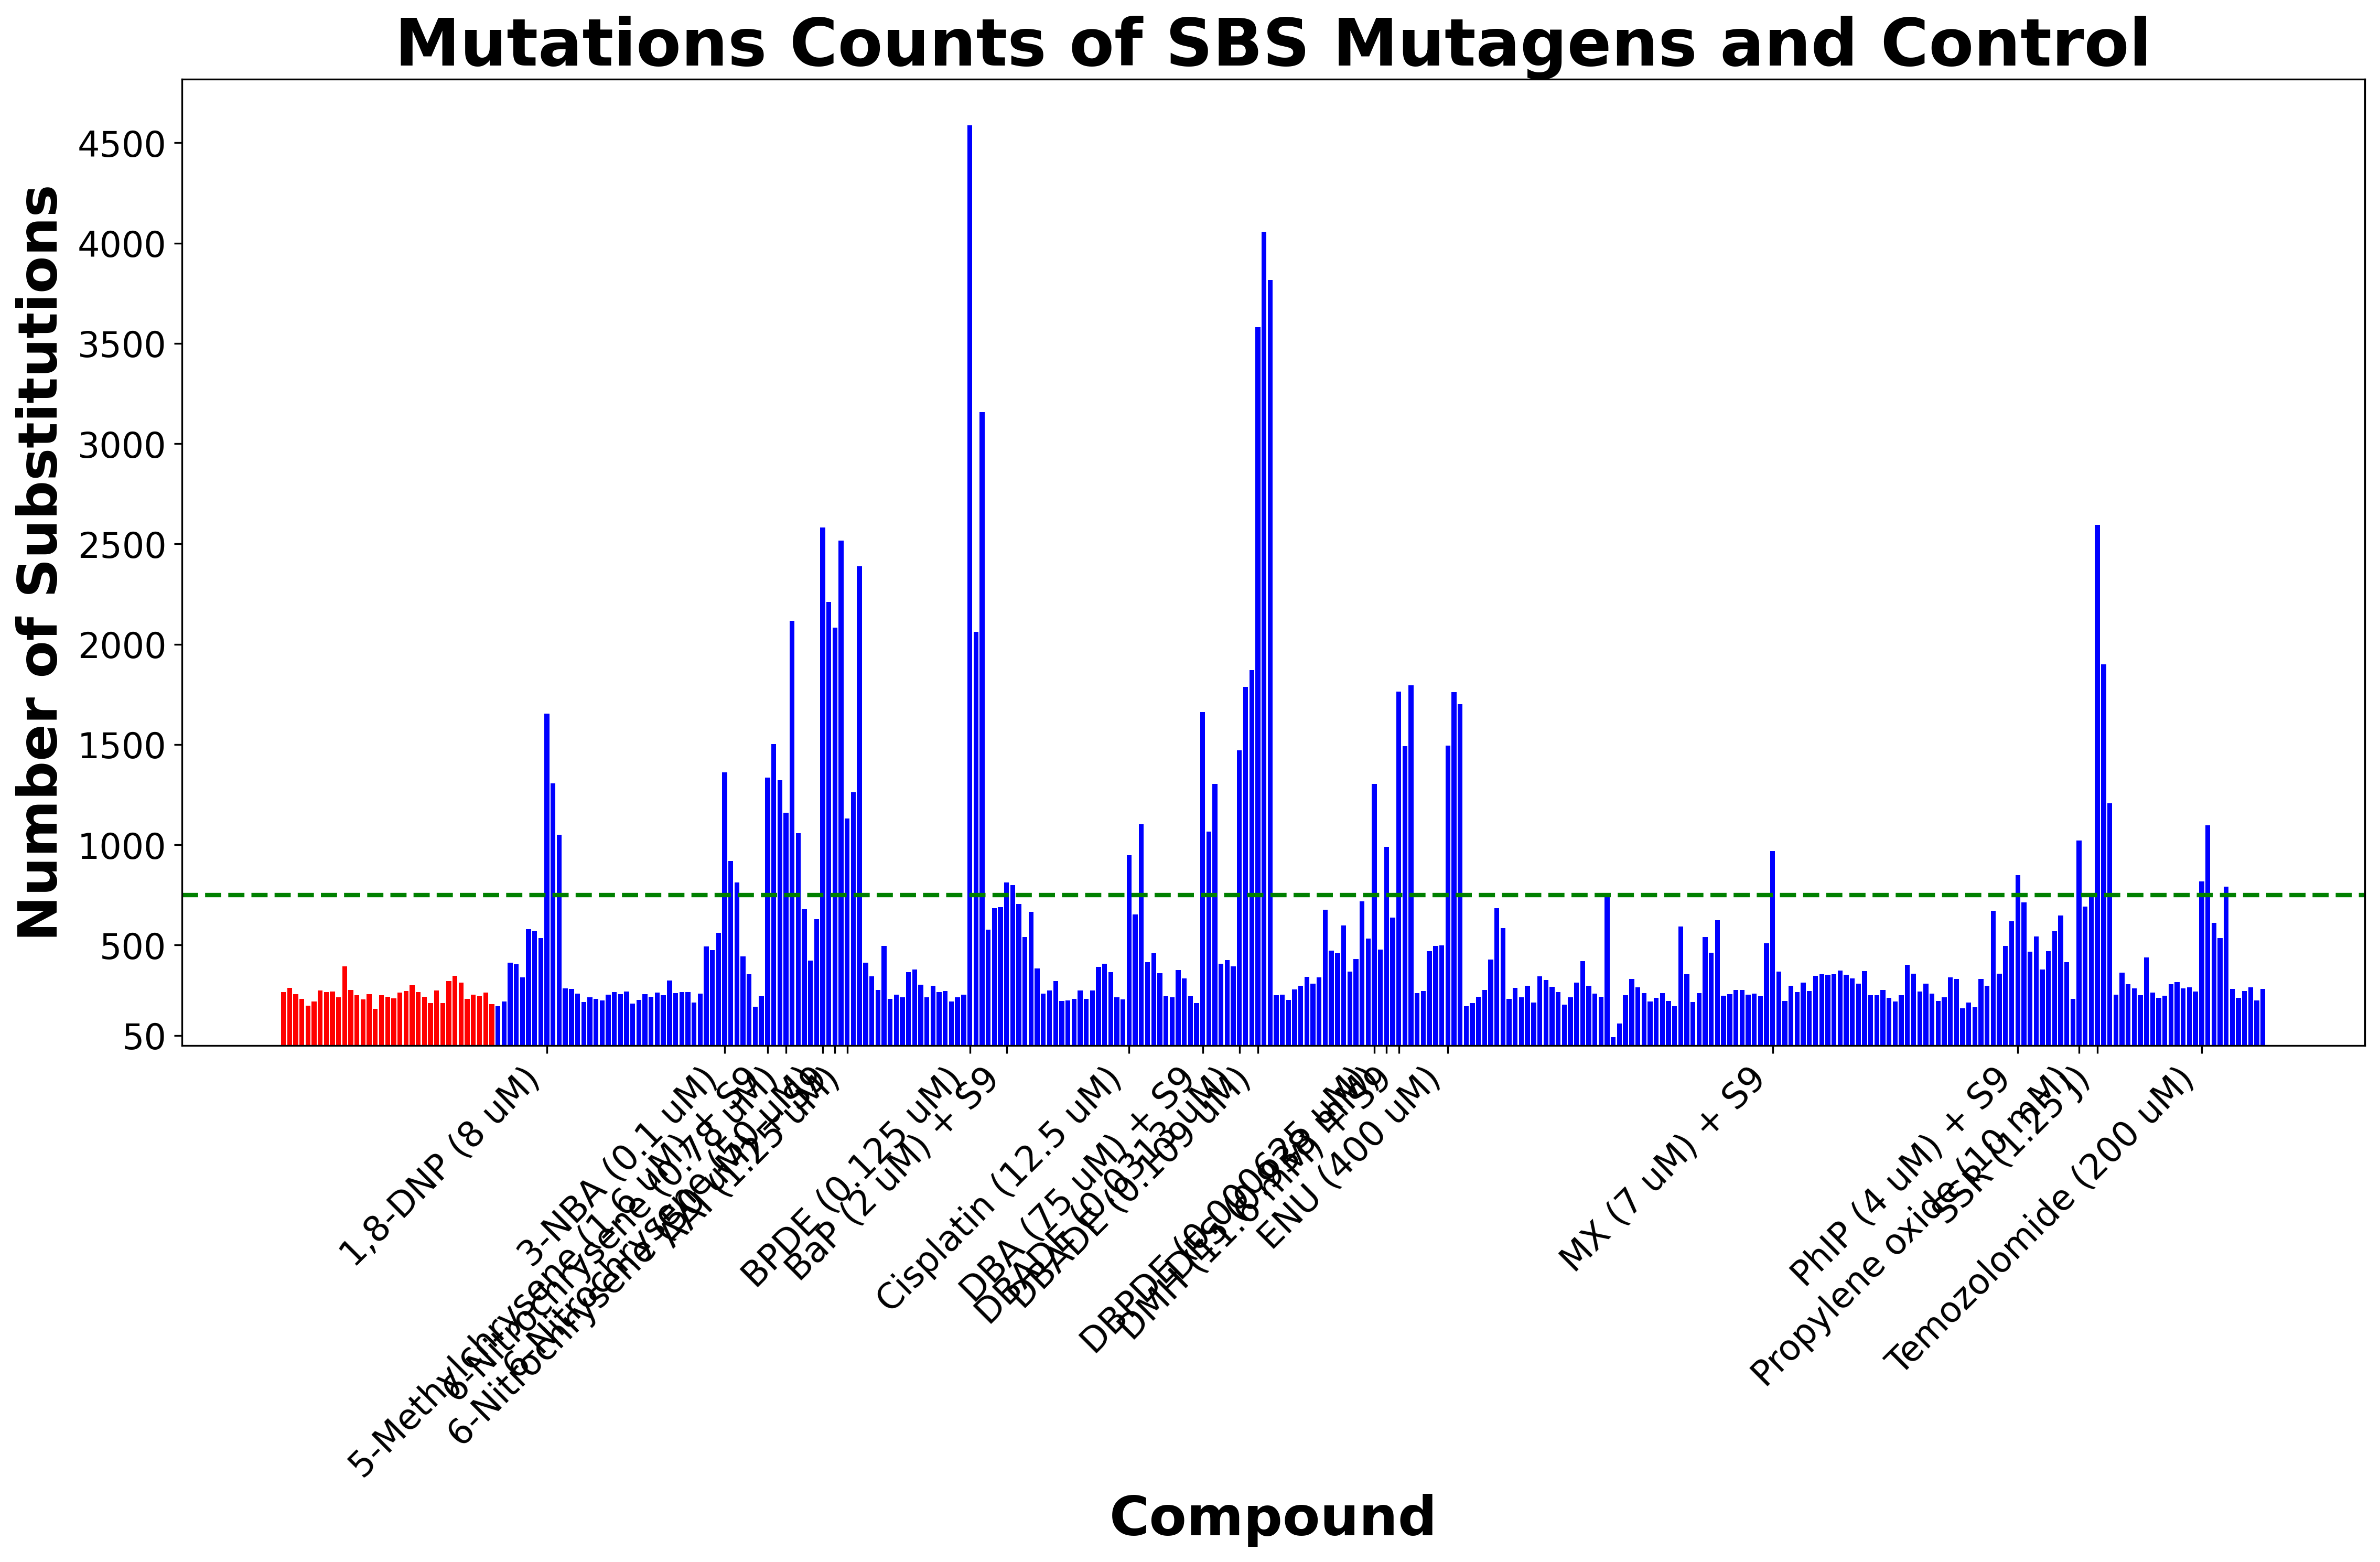

In [21]:
# create histogram of all the counts (in ALL RT) - visualization
counts_data = all_control_counts + all_exp_counts
labels = ['Control']*len(control_names_cut) + exp_names_cut

plt.figure(figsize=(16,12), dpi=300)
plt.rcParams.update({'font.size': 25})
bars = plt.bar(range(len(counts_data)), counts_data, color=['red' if 'Control' in name else 'blue' for name in labels])

# Find unique labels for bars above 750
unique_high_value_labels = set()
high_value_indices = []
high_value_labels = []

for i, (count, label) in enumerate(zip(counts_data, labels)):
    if count > 750 and label not in unique_high_value_labels:
        unique_high_value_labels.add(label)
        high_value_indices.append(i)
        high_value_labels.append(label)

# Set x-axis ticks and labels only for unique high-value bars
plt.xticks(high_value_indices, high_value_labels, rotation=45, ha='right')

plt.axhline(y=750, color='green', linestyle='--', linewidth=2)

# Set specific y-axis ticks
specific_ticks = [50, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
plt.yticks(specific_ticks, specific_ticks)
plt.title('Mutations Counts of SBS Mutagens and Control', fontweight='bold')
plt.xlabel('Compound', fontweight='bold')
plt.ylabel('Number of Substitutions', fontweight='bold')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [22]:
#initial mann-whitney test
def calculate_mann_whitney(exp_sums, control_sums):

  p_vals = [] #list of the p-vals from each test (165 total)
  exp_sums_specific = [] #list of mutation count for each test (165 total)

  for name in sorted(set(exp_names_cut)):
    ind = [index for index, value in enumerate(exp_names_cut) if value == name] # the indices of the name
    #get the counts of this compounds replicates
    tmp = []
    for i in ind:
      tmp.append(exp_sums[i])
    #perform mann-whitney on the compounds counts and the control
    statistic, p_value = mannwhitneyu(control_sums, tmp)
    exp_sums_specific.append(sorted(tmp))
    p_vals.append(p_value)

  #create a df with each compounds counts and p-val from the test
  data = {
    'Gene': sorted(set(exp_names_cut)),
    'Count': exp_sums_specific,
    'Control': [control_sums]*len(sorted(set(exp_names_cut))),
    'P-val': p_vals
  }
  df = pd.DataFrame(data)
  return df

all_df = calculate_mann_whitney(all_exp_counts, all_control_counts)
early_df = calculate_mann_whitney(early_exp_counts, early_control_counts)
late_df = calculate_mann_whitney(late_exp_counts, late_control_counts)

In [23]:
def find_min_pval_df(gene, all, early, late):
    # Select the p-val for the specific gene
    pval1 = all[all['Gene'] == gene]['P-val'].iloc[0] if gene in all['Gene'].values else float('inf')
    pval2 = early[early['Gene'] == gene]['P-val'].iloc[0] if gene in early['Gene'].values else float('inf')
    pval3 = late[late['Gene'] == gene]['P-val'].iloc[0] if gene in late['Gene'].values else float('inf')

    # Find the DataFrame with the minimal p-val for the gene
    min_pval_df_name = min((('all', pval1), ('early', pval2), ('late', pval3)), key=lambda x: x[1])[0]
    min_pval_value = min(pval1, pval2, pval3)

    return {'Gene': gene, 'Source': min_pval_df_name, 'MinPVal': min_pval_value}

# Create a list of dictionaries for each gene
gene_dicts = [find_min_pval_df(gene, all_df, early_df, late_df) for gene in sorted(set(exp_names_cut))]

# Create the final DataFrame
result_df = pd.DataFrame(gene_dicts)
print(result_df)


                             Gene Source   MinPVal
0         1,4-Benzoquinone (5 uM)   late  0.040291
1               1,6-DNP (0.09 uM)    all  0.006778
2              1,8-DNP (0.125 uM)   late  0.004839
3                  1,8-DNP (8 uM)   late  0.004839
4    1-Nitropyrene (1.75 uM) + S9  early  0.080558
..                            ...    ...       ...
107          Sudan I (20 uM) + S9  early  0.148382
108         Temozolomide (200 uM)   late  0.000370
109         o-Anisidine (0.85 mM)  early  0.614167
110       o-Anisidine (6 mM) + S9    all  0.190127
111      o-Toluidine (14 mM) + S9  early  0.590733

[112 rows x 3 columns]


In [24]:
#get all the genes that their min_Pval is greater than 0.1
big01_genes = result_df[result_df['MinPVal'] > 0.1]['Gene'].tolist()
print(len(big01_genes), big01_genes)

# Filter all_df to include only the genes with min_p_val>0.1 (that will join the control)
big01_df = all_df[all_df['Gene'].isin(big01_genes)]

# Find the gene with the minimum P-value within the specified genes
min_pval_gene = big01_df.loc[big01_df['P-val'].idxmin(), 'Gene']
pval_threshold = big01_df.loc[big01_df['P-val'].idxmin(), 'P-val']

print(f"The gene with the minimum all_P-value among the big0.1 is: {min_pval_gene}")
print(f"The corresponding P-value is: {pval_threshold}")
control_genes = all_df[all_df['P-val']>=pval_threshold]['Gene'].tolist() # a list of the genes that their all_pval is bigger than the threshold we found (1.33333)
print(len(control_genes), control_genes)

50 ['1-Nitropyrene (2.5  uM) + S9', '2,6-Dimethylaniline (11 mM) + S9', '2,6-Dimethylaniline (3.8 mM)', '2-Naphthylamine (200 uM)', '2-Naphthylamine (200 uM) + HS9', '2-Naphthylamine (400 uM) + S9', '2-Nitrofluorene (10 uM)', '2-Nitrofluorene (40 uM)', '2-Nitrotoluene (4.6 mM) + S9', '4-ABP (40 uM) + S9', 'AFB1 (0.25 uM) + S9', 'AZ20 (0.9375 uM)', 'Acetaldehyde (0.9 mM)', 'Acetaldehyde (12 mM)', 'Acrolein (5 uM)', 'Acrylamide (9.5 mM) + S9', 'Benzidine (900 uM) + S9', 'Bleomycin (0.188 uM)', 'Cadmium chloride (2.5 uM)', 'Camptothecin (0.0063 uM)', 'Catechol (5.5 uM)', 'Cobalt (II) chloride (250 uM)', 'DBC (1.5 uM)', 'DMH (9 mM)', 'Ellipticine (0.25 uM)', 'Ellipticine (0.625 uM) + S9', 'Etoposide (0.0188 uM)', 'Formaldehyde (85.5 uM)', 'Gamma irradiation (2 Gray)', 'Glycidamide (475 uM)', 'H2O2 (24.5 uM)', 'IQ (450 uM)', 'Lead (II) acetate (75 uM)', 'MNNG (0.75 uM)', 'MOCA (37.5 uM) + S9', 'MOCA (5 uM)', 'MX (2.5 uM)', 'MeAaC (70 uM)', 'MeIQX (300 uM)', 'Methyleugenol (1.9 mM) + S9', 'M

In [25]:
all_new_control_df = all_df[all_df['Gene'].isin((control_genes))] #df of the samples that become control
all_new_control_list = all_new_control_df['Count'].tolist() #list of the control counts
all_new_control_counts = [item for sublist in all_new_control_list for item in sublist]
all_new_control_counts = all_control_counts + all_new_control_counts
all_new_control_names = control_names_cut +all_new_control_df['Gene'].tolist()
print(len(all_new_control_list), all_new_control_list, '\n', len(all_new_control_counts), all_new_control_counts, '\n', len(all_new_control_names), all_new_control_names)

early_new_control_df = early_df[early_df['Gene'].isin((control_genes))] #df of the samples that become control
early_new_control_list = early_new_control_df['Count'].tolist() #list of the control counts
early_new_control_counts = [item for sublist in early_new_control_list for item in sublist]
early_new_control_counts = early_control_counts + early_new_control_counts
early_new_control_names = control_names_cut +early_new_control_df['Gene'].tolist()
print(len(early_new_control_list), early_new_control_list, '\n', len(early_new_control_counts), early_new_control_counts, '\n', len(early_new_control_names), early_new_control_names)

late_new_control_df = late_df[late_df['Gene'].isin((control_genes))] #df of the samples that become control
late_new_control_list = late_new_control_df['Count'].tolist() #list of the control counts
late_new_control_counts = [item for sublist in late_new_control_list for item in sublist]
late_new_control_counts = late_control_counts + late_new_control_counts
late_new_control_names = control_names_cut +late_new_control_df['Gene'].tolist()
print(len(late_new_control_list), late_new_control_list, '\n', len(late_new_control_counts), late_new_control_counts, '\n', len(late_new_control_names), late_new_control_names)

53 [[282, 285], [215, 259], [232, 240], [223, 252], [255, 266, 268], [209, 226, 256], [241, 263], [249, 323], [260, 266, 266], [213, 258], [192, 246], [232, 495], [240, 253], [240, 303], [266, 297], [220, 272], [240, 252], [257, 274, 320], [222, 225], [233, 274], [233, 273], [230, 240], [239, 246], [211, 246], [227, 251, 253], [260, 271], [243, 277], [239, 287], [213, 296], [203, 239, 265], [242, 258], [41, 110, 745], [250, 332], [261, 290], [218, 237, 261], [215, 260], [247, 255, 277], [253, 275], [244, 257], [222, 298], [267, 270, 312], [249, 251, 276], [218, 237, 251], [257, 307], [222, 240], [190, 330], [232, 415], [250, 284, 439], [236, 247, 263], [268, 289], [236, 281], [270, 290], [225, 281]] 
 155 [265, 287, 255, 231, 197, 219, 274, 265, 268, 239, 394, 277, 251, 230, 256, 181, 251, 243, 235, 262, 271, 301, 265, 243, 210, 273, 211, 322, 346, 312, 232, 254, 246, 263, 205, 282, 285, 215, 259, 232, 240, 223, 252, 255, 266, 268, 209, 226, 256, 241, 263, 249, 323, 260, 266, 266, 213,

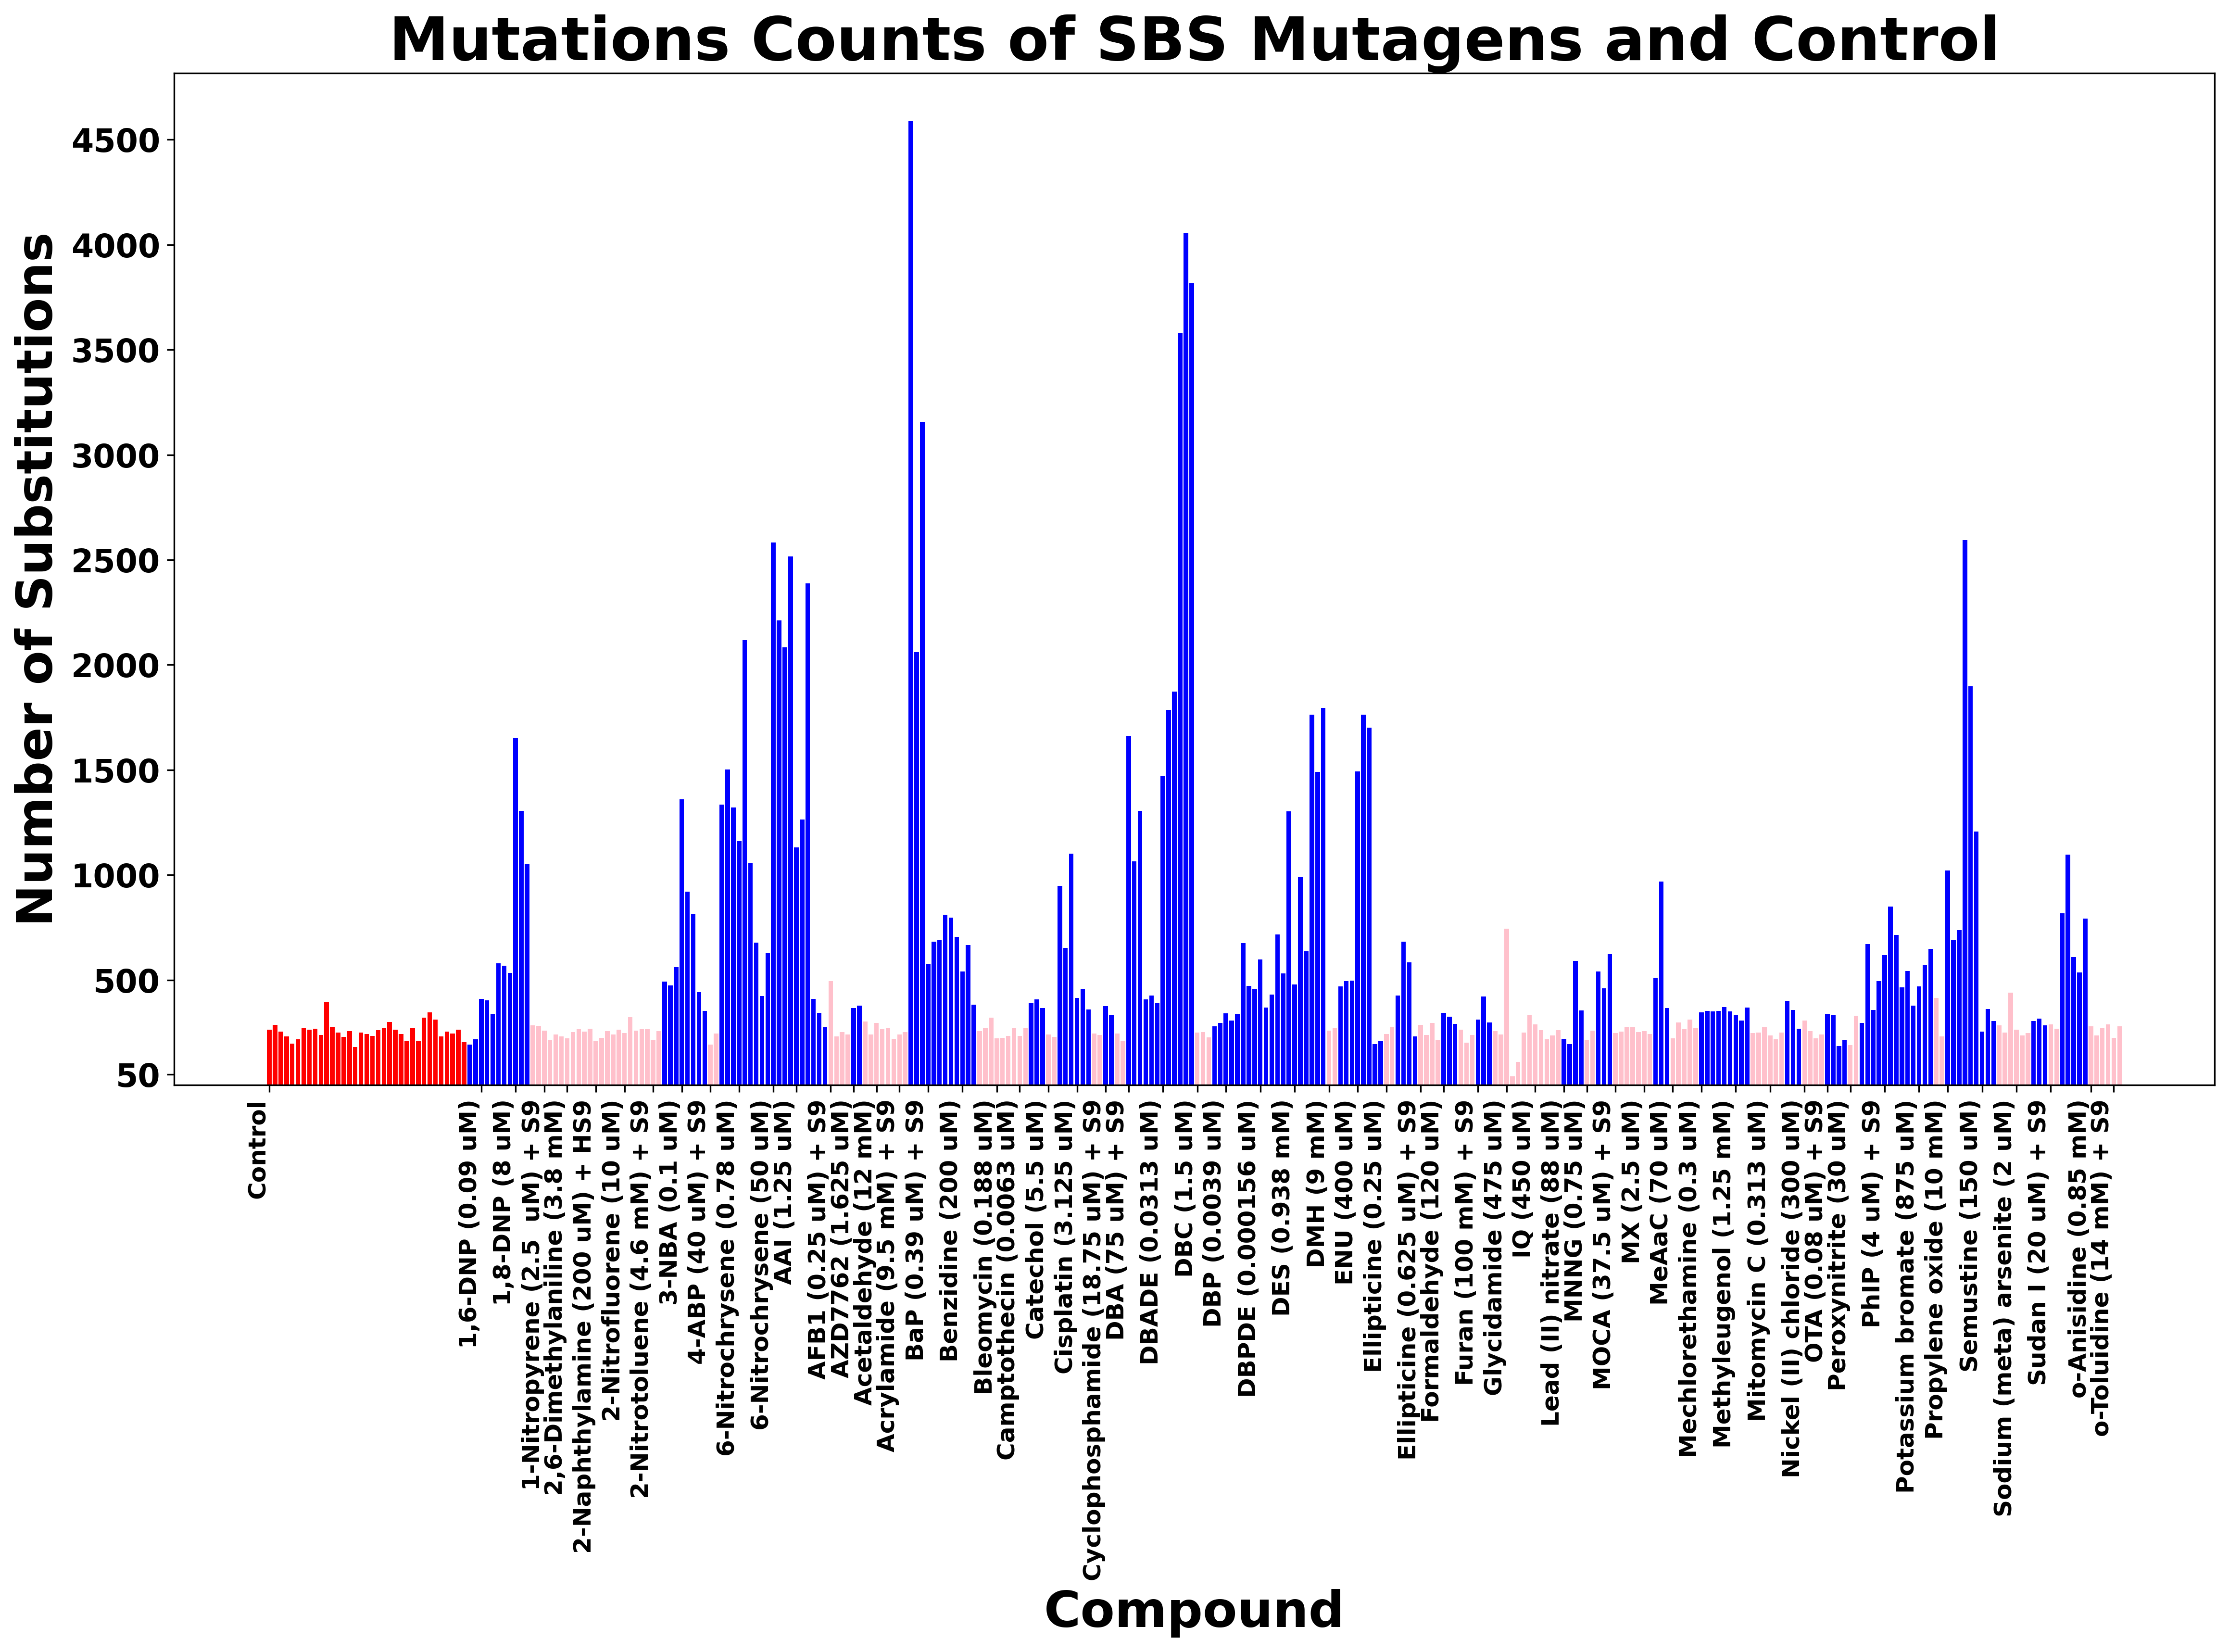

In [26]:
# create histogram of all the counts (in ALL RT) -  visualization
counts_data = all_control_counts + all_exp_counts
labels = ['Control']*len(control_names_cut) + exp_names_cut

plt.figure(figsize=(16,12), dpi=300)
plt.rcParams.update({'font.size': 25})
bars = plt.bar(
    range(len(counts_data)),
    counts_data,
    color=[
        'red' if name == 'Control' else
        'pink' if name in all_new_control_names else
        'blue'
        for name in labels
    ]
)

unique_labels = set()
unique_label_indices = []
final_xtick_labels = []
for i, name in enumerate(labels):
    if name not in unique_labels:
        unique_labels.add(name)
        unique_label_indices.append(i)
        final_xtick_labels.append(name)

filtered_indices = unique_label_indices[::2]
filtered_labels = final_xtick_labels[::2]

plt.xticks(filtered_indices, filtered_labels, rotation=90, ha='right',fontsize=12, fontweight='bold')

# Set specific y-axis ticks
specific_ticks = [50, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
plt.yticks(specific_ticks, specific_ticks, fontsize=16, fontweight='bold')
plt.title('Mutations Counts of SBS Mutagens and Control', fontweight='bold')
plt.xlabel('Compound', fontweight='bold')
plt.ylabel('Number of Substitutions', fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
#mann whitney updated - with the expanded control
#get the p-values of all exp
name = exp_names_cut[0] #exp names - 165 exp names (not full)
counts = [all_exp_counts[0]]
all_u_pvals = []
for i in range(1, len(exp_names_cut)):
  if exp_names_cut[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
    all_u_pvals.extend([p_value]*len(counts))
    name = exp_names_cut[i] # new KO
    counts = [all_exp_counts[i]] #new counts list
  else: #same exp
    counts.append(all_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
all_u_pvals.extend([p_value]*len(counts))
print(len(all_u_pvals), all_u_pvals)

#get the p-values of early exp
name = exp_names_cut[0]
counts = [early_exp_counts[0]]
early_u_pvals = []
for i in range(1, len(exp_names_cut)):
  if exp_names_cut[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
    early_u_pvals.extend([p_value]*len(counts))
    name = exp_names_cut[i]
    counts = [early_exp_counts[i]]
  else: #same exp
    counts.append(early_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
early_u_pvals.extend([p_value]*len(counts))
print(len(early_u_pvals), early_u_pvals)


#get the p-values of late exp
name = exp_names_cut[0]
counts = [late_exp_counts[0]]
late_u_pvals = []
for i in range(1, len(exp_names_cut)):
  if exp_names_cut[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
    late_u_pvals.extend([p_value]*len(counts))
    name = exp_names_cut[i]
    counts = [late_exp_counts[i]]
  else: #same exp
    counts.append(late_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
late_u_pvals.extend([p_value]*len(counts))
print(len(late_u_pvals), late_u_pvals)

reject, all_u_p_adj, _, _ = multipletests(all_u_pvals, method='fdr_bh')
reject, early_u_p_adj, _, _ = multipletests(early_u_pvals, method='fdr_bh')
reject, late_u_p_adj, _, _ = multipletests(late_u_pvals, method='fdr_bh')
all_u_p_adj = list(all_u_p_adj)
early_u_p_adj = list(early_u_p_adj)
late_u_p_adj = list(late_u_p_adj)
#manage control
all_u_pvals.extend([1]*len(all_control_counts))
early_u_pvals.extend([1]*len(early_control_counts))
late_u_pvals.extend([1]*len(late_control_counts))
all_u_p_adj.extend([1]*len(all_control_counts))
early_u_p_adj.extend([1]*len(early_control_counts))
late_u_p_adj.extend([1]*len(late_control_counts))
print('manage control')
print(len(all_u_pvals), len(early_u_pvals), len(late_u_pvals), len(all_u_p_adj), len(early_u_p_adj), len(late_u_p_adj))

289 [np.float64(0.04029281026871178), np.float64(0.04029281026871178), np.float64(0.005475349680214059), np.float64(0.005475349680214059), np.float64(0.005475349680214059), np.float64(0.0035250239747655217), np.float64(0.0035250239747655217), np.float64(0.0035250239747655217), np.float64(0.0031162516204925397), np.float64(0.0031162516204925397), np.float64(0.0031162516204925397), np.float64(0.10518115116641147), np.float64(0.10518115116641147), np.float64(0.4337886718217475), np.float64(0.4337886718217475), np.float64(0.2563858431899054), np.float64(0.2563858431899054), np.float64(0.3722287270454737), np.float64(0.3722287270454737), np.float64(0.4295352525235494), np.float64(0.4295352525235494), np.float64(0.4295352525235494), np.float64(0.1463519893312297), np.float64(0.1463519893312297), np.float64(0.1463519893312297), np.float64(0.9438391525012495), np.float64(0.9438391525012495), np.float64(0.38067574135481097), np.float64(0.38067574135481097), np.float64(0.38276425016890814), np.f

In [28]:
# create summary excel file with the results
# Zip the lists together
all_names = exp_names + control_names
print(len(all_names), all_names[:5], all_names[-20:]) #$

data = zip(all_names, p_vals_all, p_adj_all, all_u_pvals, all_u_p_adj, p_vals_early, p_adj_early, early_u_pvals, early_u_p_adj, p_vals_late, p_adj_late, late_u_pvals, late_u_p_adj)

# Define the file name
file_name = 'mutagens_sbs_statistics_2rt.csv'

# Write the data to a CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'MUT ALL P-val', 'MUT ALL P-adj', 'COUNTS U ALL P-val', 'COUNTS U ALL P-adj', 'MUT EARLY P-val', 'MUT EARLY P-adj', 'COUNTS U EARLY P-val', 'COUNTS U EARLY P-adj', 'MUT LATE P-val', 'MUT LATE P-adj', 'COUNTS U LATE P-val', 'COUNTS U LATE P-adj'])  # Write header
    writer.writerows(data)  # Write data rows

print(f"CSV file '{file_name}' has been created.")

324 ['1,4-Benzoquinone (5 uM)_s1', '1,4-Benzoquinone (5 uM)_s3', '1,6-DNP (0.09 uM)_s1', '1,6-DNP (0.09 uM)_s2', '1,6-DNP (0.09 uM)_s3'] ['DMSO Control (0.68%_s2', 'H2O Control (0.1%)_s1', 'H2O Control (0.1%)_s2', 'H2O Control (0.1%)_s1', 'H2O Control (0.1%)_s2', 'MeOH Control (1.3%)_s1', 'MeOH Control (1.3%)_s2', 'MeOH Control (1.3%)_s3', 'MeOH Control (4.3%) + S9_s1', 'MeOH Control (4.3%) + S9_s2', 'Media Control_s1', 'Media Control_s2', 'Media Control_s2', 'Media Control_s3', 'Media Control_s4', 'Media Control + S9_s1', 'Media Control + S9_s2', 'Media Control + S9_s3', 'NaCl Control (0.003%)_s1', 'NaCl Control (0.003%)_s2']
CSV file 'mutagens_sbs_statistics_2rt.csv' has been created.


In [29]:
#calculate geometric mean of each KO's replicates bootstrapping results
exp_names_cut = [name.split('_')[0] for name in exp_names]

name = sorted(set(exp_names_cut))[0]
mut_all_geo = []
mut_early_geo = []
mut_late_geo = []
count_all = [all_u_p_adj[0]]
count_early = [early_u_p_adj[0]]
count_late = [late_u_p_adj[0]]

tmp_all = [p_adj_all[0]]
tmp_early = [p_adj_early[0]]
tmp_late = [p_adj_late[0]]

counter = 1
for n in exp_names_cut[1:]:
  if n == name: #same ko
    tmp_all.append(p_adj_all[counter])
    tmp_early.append(p_adj_early[counter])
    tmp_late.append(p_adj_late[counter])
    counter = counter+1
  else: #new KO
    mut_all_geo.append(gmean(tmp_all))
    mut_early_geo.append(gmean(tmp_early))
    mut_late_geo.append(gmean(tmp_late))

    tmp_all = [p_adj_all[counter]]
    tmp_early = [p_adj_early[counter]]
    tmp_late = [p_adj_late[counter]]
    count_all.append(all_u_p_adj[counter])
    count_early.append(early_u_p_adj[counter])
    count_late.append(late_u_p_adj[counter])
    counter = counter+1
    name = n

#last KO
mut_all_geo.append(gmean(tmp_all))
mut_early_geo.append(gmean(tmp_early))
mut_late_geo.append(gmean(tmp_late))

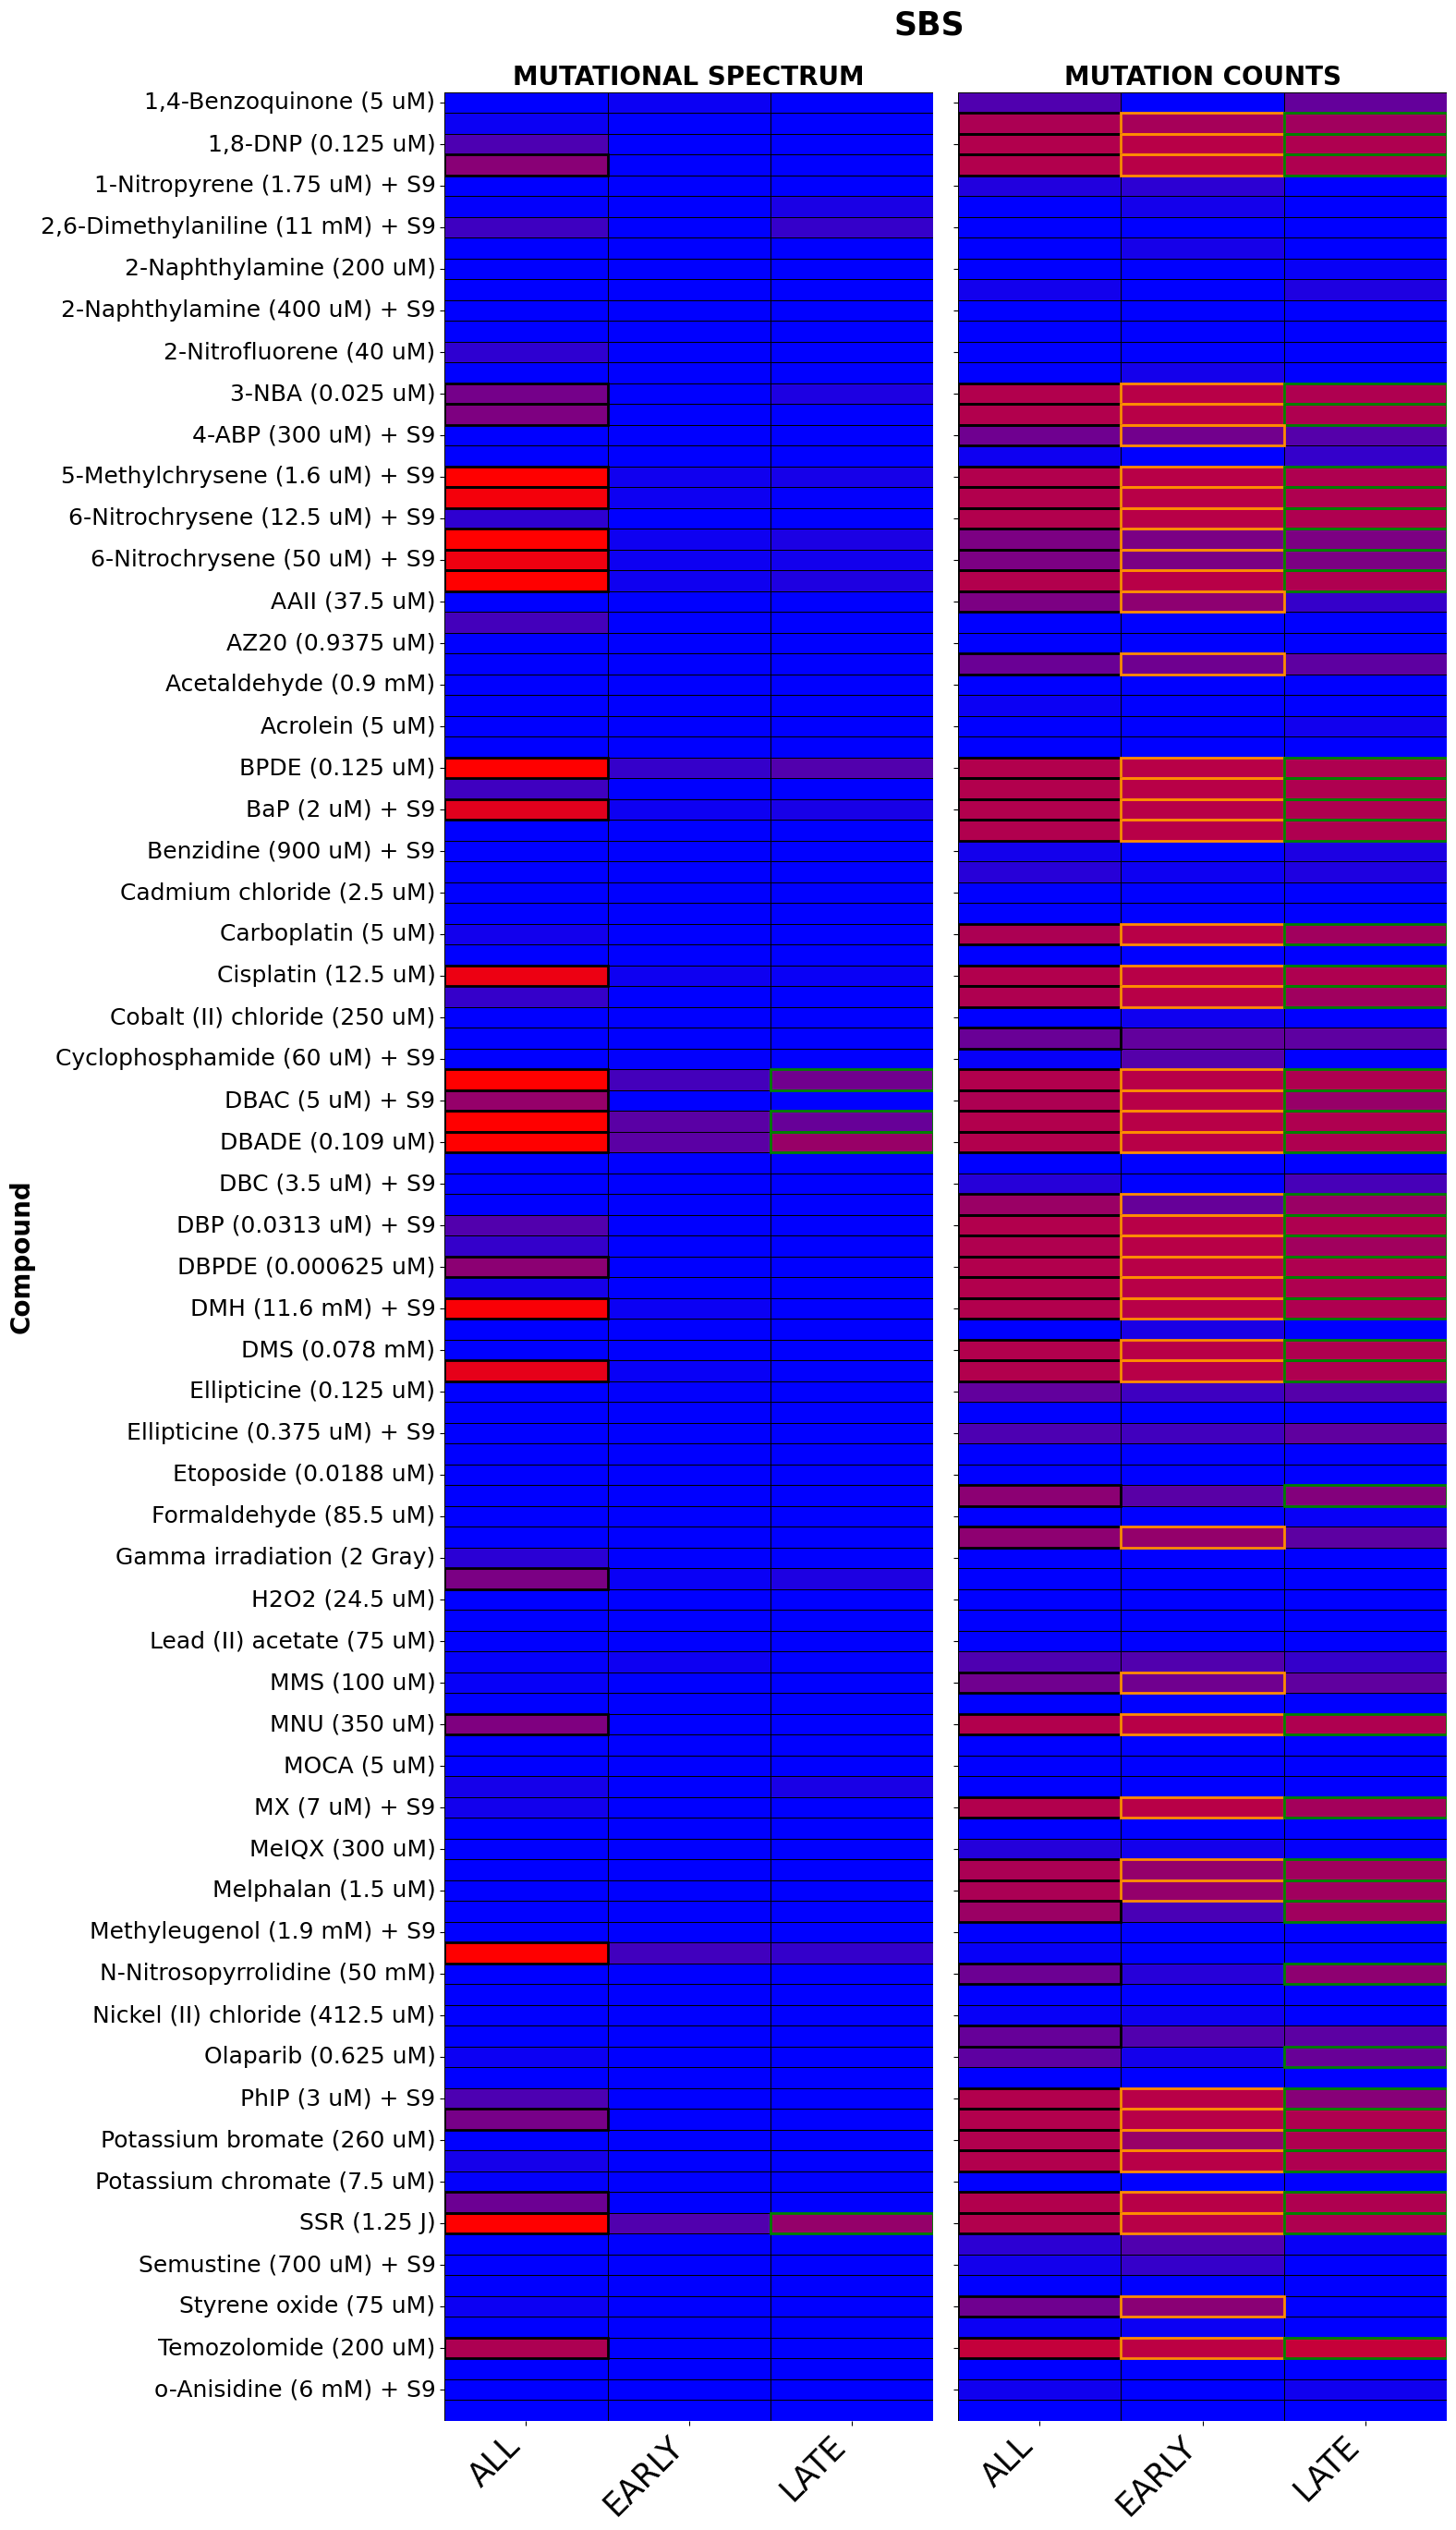

In [31]:
# summary histogram of the results
# Create DataFrame
df = pd.DataFrame({
    'MUT ALL': mut_all_geo,
    'MUT EARLY': mut_early_geo,
    'MUT LATE': mut_late_geo,
    'COUNTS ALL': count_all,
    'COUNTS EARLY': count_early,
    'COUNTS LATE': count_late
}, index=sorted(set(exp_names_cut)))


# Split into MUT and COUNTS dataframes
df_mut = df[['MUT ALL', 'MUT EARLY', 'MUT LATE']]
df_counts = df[['COUNTS ALL', 'COUNTS EARLY', 'COUNTS LATE']]

# Transform to -log10
df_mut_trans = -np.log10(df_mut.replace(0, 1e-10))
df_counts_trans = -np.log10(df_counts.replace(0, 1e-10))

threshold = 1.3

# Set up figure and gridspec
fig, axs = plt.subplots(1, 2, figsize=(14, 30), gridspec_kw={'width_ratios': [1, 1]}, sharey=True)

# Create custom blue-to-red colormap (no white in middle)
colors = ['blue', 'red']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue_red', colors)

vmin_val = 0.5
vmax_val = 2.5

# Plot heatmap 1: MUTATIONAL SPECTRUM
sns.heatmap(df_mut_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
            linewidths=0.5, annot=False, ax=axs[0], cbar=False, linecolor='black')

edge_colors = {
    0: 'black',   # MUT/COUNTS ALL
    1: 'darkorange',    # MUT/COUNTS EARLY
    2: 'green'   # MUT/COUNTS LATE
}

for y in range(df_mut_trans.shape[0]):
    for x in range(df_mut_trans.shape[1]):
        if df_mut_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')  # fallback to yellow if something unexpected
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=2)
            axs[0].add_patch(rect)

axs[0].set_title("MUTATIONAL SPECTRUM", fontsize=20, fontweight='bold')
axs[0].set_ylabel("Compound", fontweight='bold', fontsize=20)
axs[0].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')

axs[0].set_yticks(np.arange(len(df_mut_trans.index)))  # Set tick positions
axs[0].set_yticklabels(df_mut_trans.index, fontsize=18)  # Set tick labels (Make them smaller if needed)

# Plot heatmap 2: MUTATION COUNTS (with colorbar)
heatmap = sns.heatmap(df_counts_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
                      linewidths=0.5, annot=False, ax=axs[1], cbar=False, cbar_kws={'shrink': 0.8, 'aspect': 30}, linecolor='black')


for y in range(df_counts_trans.shape[0]):
    for x in range(df_counts_trans.shape[1]):
        if df_counts_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=2)
            axs[1].add_patch(rect)

axs[1].set_title("MUTATION COUNTS", fontsize=20, fontweight='bold')
axs[1].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
axs[1].tick_params(axis='y', labelleft=False)

# Overall title
fig.suptitle("SBS", fontsize=25, fontweight='bold')

# Use tight layout *without warning*
fig.subplots_adjust(top=0.95, wspace=0.05)
plt.show()

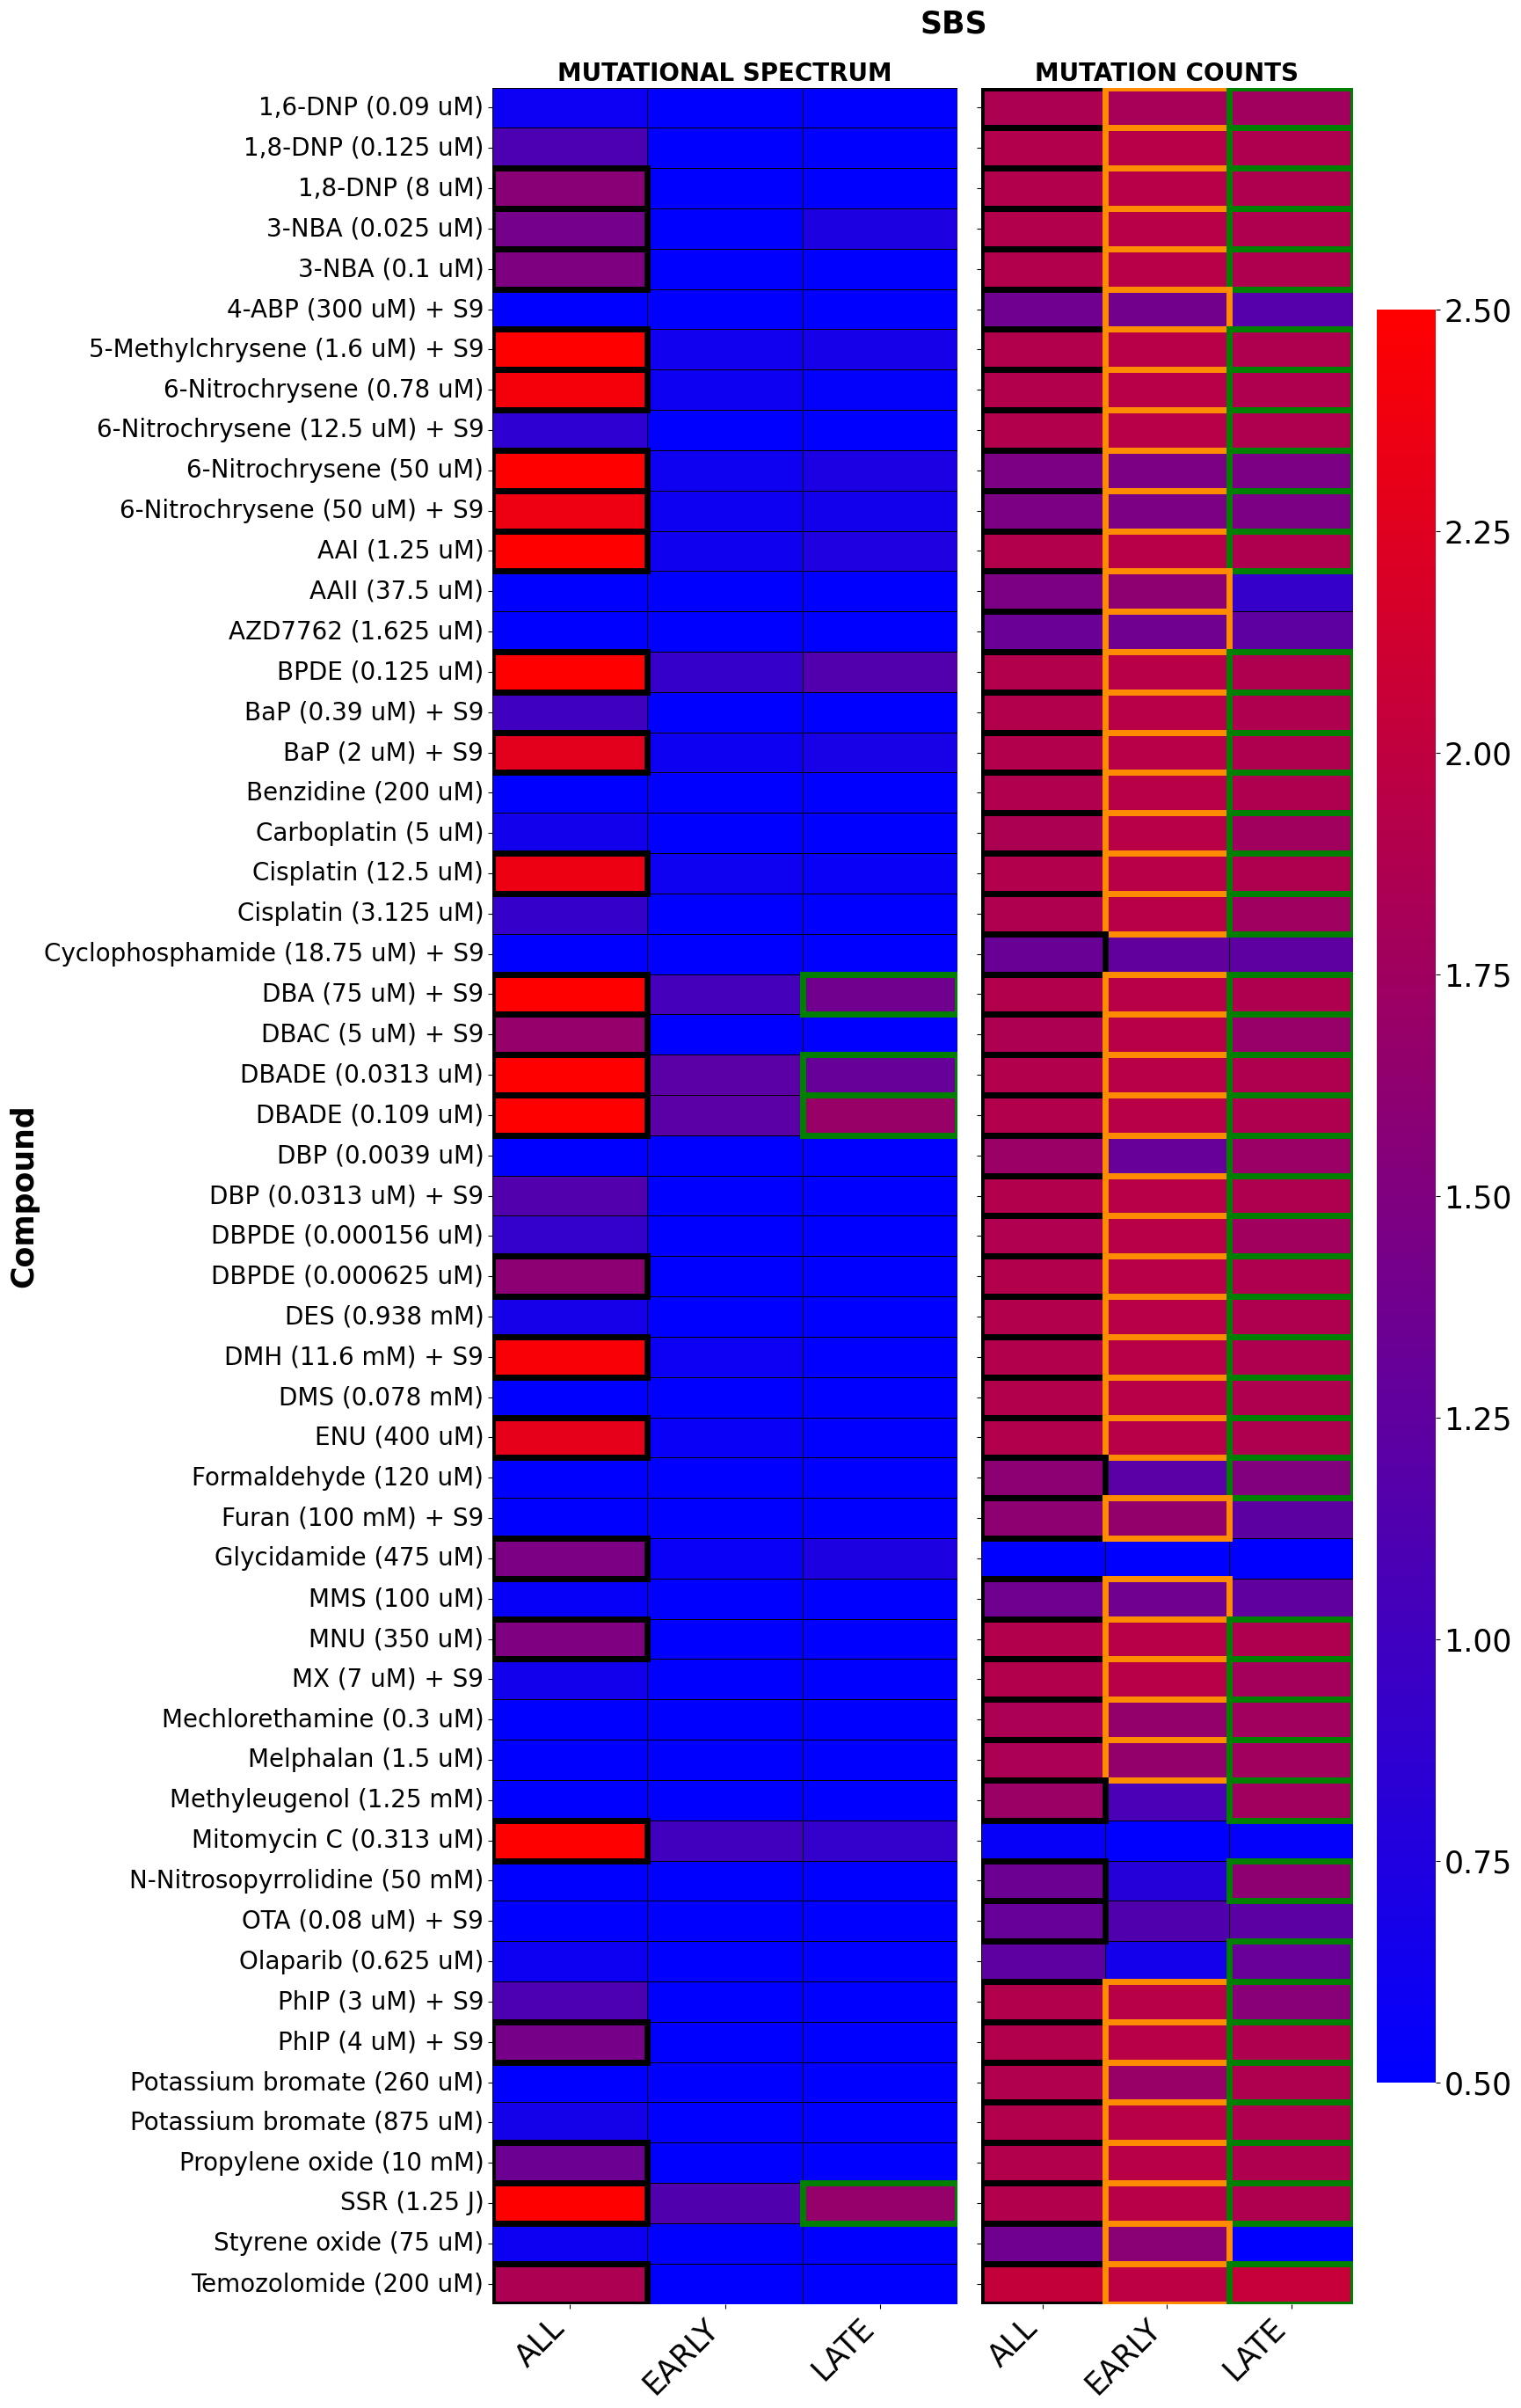

In [33]:
#filtered heatmap - only mutagens with an effect

# Create DataFrame
df = pd.DataFrame({
    'MUT ALL': mut_all_geo,
    'MUT EARLY': mut_early_geo,
    'MUT LATE': mut_late_geo,
    'COUNTS ALL': count_all,
    'COUNTS EARLY': count_early,
    'COUNTS LATE': count_late
}, index=sorted(set(exp_names_cut)))

# Split into MUT and COUNTS dataframes
df_mut = df[['MUT ALL', 'MUT EARLY', 'MUT LATE']]
df_counts = df[['COUNTS ALL', 'COUNTS EARLY', 'COUNTS LATE']]

# Transform to -log10
df_mut_trans = -np.log10(df_mut.replace(0, 1e-10))
df_counts_trans = -np.log10(df_counts.replace(0, 1e-10))
threshold = 1.3

# Create boolean masks for rows with any value above threshold in either df_mut_trans or df_counts_trans
mask_mut = (df_mut_trans > threshold).any(axis=1)
mask_counts = (df_counts_trans > threshold).any(axis=1)

# Combine masks to keep rows with significant values in either heatmap
mask = mask_mut | mask_counts

# Filter the transformed dataframes to keep only significant rows
filtered_df_mut_trans = df_mut_trans.loc[mask]
filtered_df_counts_trans = df_counts_trans.loc[mask]
# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 30), gridspec_kw={'width_ratios': [1, 1]}, sharey=True)

# Create custom blue-to-red colormap (no white in middle)
colors = ['blue', 'red']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue_red', colors)

vmin_val = 0.5
vmax_val = 2.5

edge_colors = {
    0: 'black',   # ALL
    1: 'darkorange',    # EARLY
    2: 'green'   # LATE
}

# Plot heatmap 1: MUTATIONAL SPECTRUM
sns.heatmap(filtered_df_mut_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
            linewidths=0.5, annot=False, ax=axs[0], cbar=False, linecolor='black')

for y in range(filtered_df_mut_trans.shape[0]):
    for x in range(filtered_df_mut_trans.shape[1]):
        if filtered_df_mut_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=5)
            axs[0].add_patch(rect)

axs[0].set_title("MUTATIONAL SPECTRUM", fontsize=20, fontweight='bold')
axs[0].set_ylabel("Compound", fontweight='bold')
axs[0].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
axs[0].set_yticks(np.arange(len(filtered_df_mut_trans.index)))
axs[0].set_yticklabels(filtered_df_mut_trans.index, fontsize=20)

# Plot heatmap 2: MUTATION COUNTS
sns.heatmap(filtered_df_counts_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
            linewidths=0.5, annot=False, ax=axs[1], cbar=True, cbar_kws={'shrink': 0.8, 'aspect': 30}, linecolor='black')

for y in range(filtered_df_counts_trans.shape[0]):
    for x in range(filtered_df_counts_trans.shape[1]):
        if filtered_df_counts_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=5)
            axs[1].add_patch(rect)

axs[1].set_title("MUTATION COUNTS", fontsize=20, fontweight='bold')
axs[1].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
axs[1].tick_params(axis='y', labelleft=False)

fig.suptitle("SBS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.95, wspace=0.05)

plt.show()